### Libraries import

In [185]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from scipy.stats import zscore
from pandas.plotting import parallel_coordinates, scatter_matrix
from sklearn.preprocessing import StandardScaler

### Reading the dataset

In [186]:
# configure load_wine to split data into features X and labels y
X, y = load_wine(as_frame=True, return_X_y=True)
# deep copy the features
df = X.copy()
# deliberately set targets (labels) to all zeros
df['target'] = 0
# we'll use the true labels in y in the subsequent task!


### Basic info about the dataset

In [187]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0

In [188]:
df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

       target  
count   178.0  
mean      0.0  
std       0.0  
min       0.0  
25%       0.0  
50%       0.0  
75%       0.0  
max       0.0

# Unlabeled Data

#### Methods used in ex.1.1

In [189]:
# plotting th eline plot of every feature in one plot
def generate_line_plot(data_frame):
    return data_frame.plot()

# plotting th eline plot of every feature in separate plots
def gather_data(dataframe ,label : str) -> tuple():
    # all values from given feature
    feature_values = dataframe[label].values.tolist()

    # size of the list
    amount = len(feature_values)

    feature_range = [i for i in range(0, amount)]

    return feature_values, feature_range

def line_plot_data(x_values:list[int], y_values: list[float], ax: plt.axes):

    ax.plot(x_values, y_values)
    ax.set_xlabel("Sample number")


def line_plots_of_features():
    labels = df.columns
    labels = labels[0:-1]
    fig, axs = plt.subplots(3, 5, figsize=(20, 15))
    axs = axs.ravel()

    for i, label in enumerate(labels):
        feature_values, feature_range = gather_data(df, label)
        line_plot_data(feature_range, feature_values, axs[i])
        axs[i].set_title(f'{label} in wine sample')
        axs[i].set_ylabel(f'{label} value')


# for plotting heatmap
def plot_heatmap(data_frame):
    heatmap_df = data_frame.copy()
    heatmap_df = heatmap_df.apply(zscore)
    sns.heatmap(heatmap_df, cmap='coolwarm_r')


# for plotting parallel lines
def plot_parrallel_lines(data_frame, legend, iflabel=False):
    unlabeled_df = data_frame.copy()
    if iflabel:
        unlabeled_df['target'] = y
    else:
        unlabeled_df['target'] = 0
    plt.figure(figsize=(15, 10))
    plt.title('Parallel Coordinates Plot')
    parallel_coordinates(unlabeled_df, 'target', colormap='viridis')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Feature values')
    plt.legend(loc="upper left", title=legend)


### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

In [190]:
targetless_df = df.copy()
targetless_df.drop(columns='target', inplace=True)

### Line plot of all features

<Axes: >

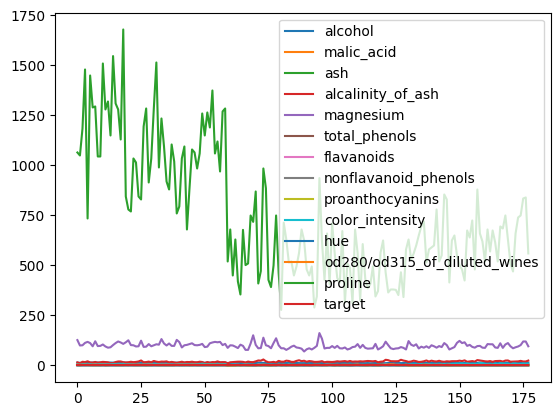

In [191]:
generate_line_plot(df)

As we can see the plot is unreadable for most of the measurements. We can only see ash values and magnesium on the scale. Rest of the features overlaps with themselves

### Plot line of each feature

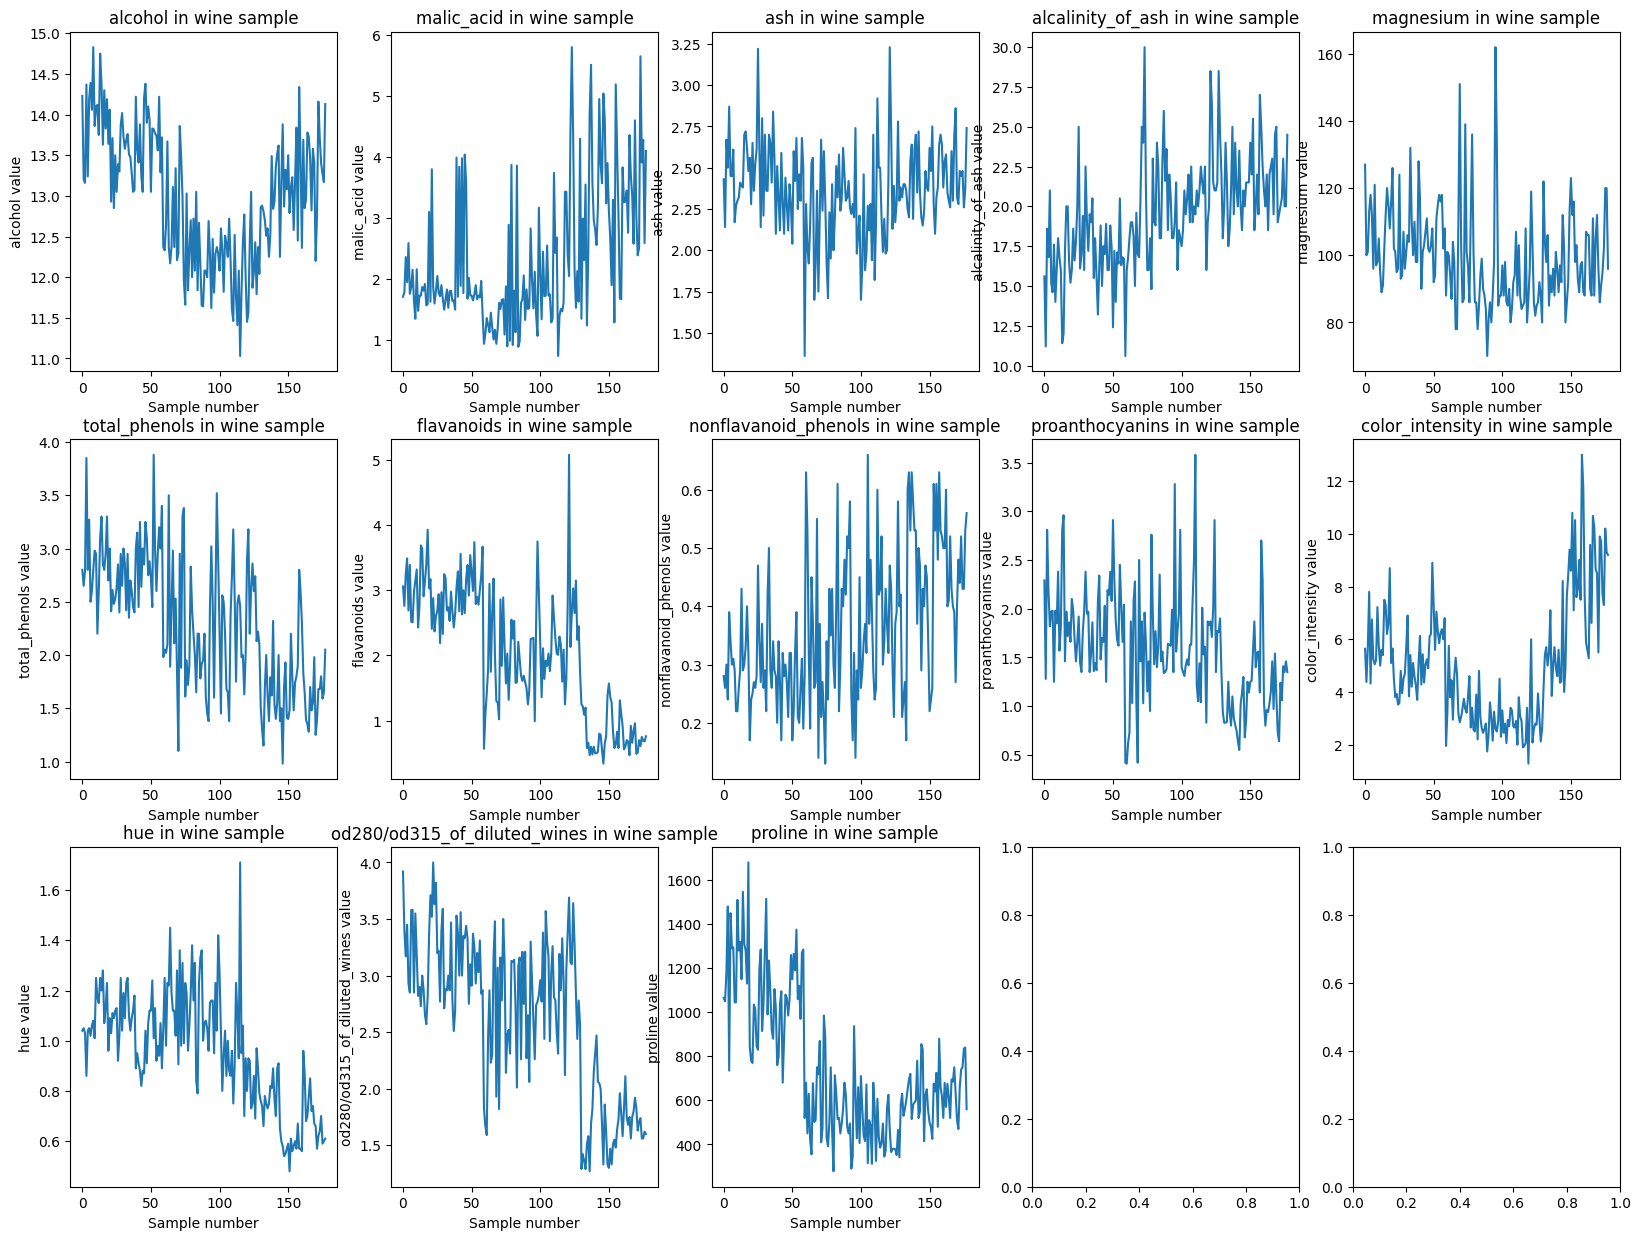

In [192]:
line_plots_of_features()

#### Heatmap

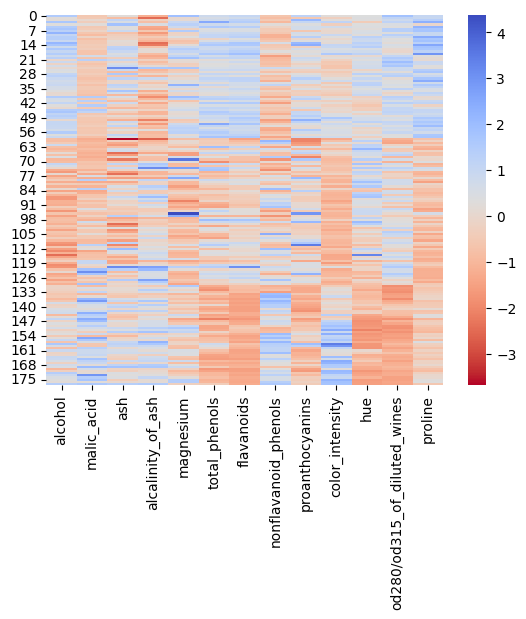

In [193]:
plot_heatmap(targetless_df)

#### Parallel lines plot

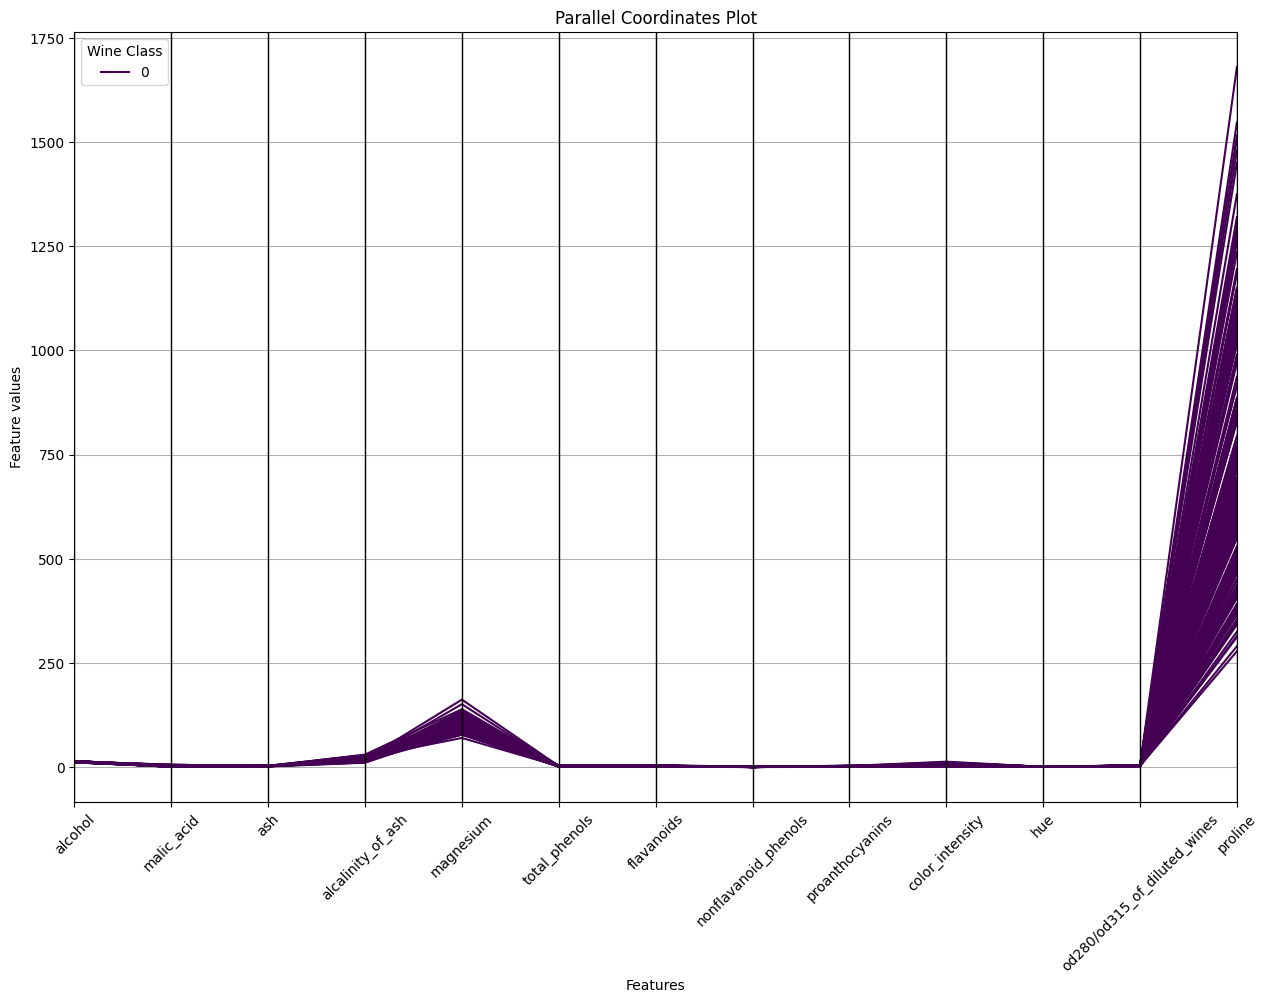

In [194]:
plot_parrallel_lines(df, legend="Wine Class")

## 2. Decide whether the data needs scaling.

Just by looking at the plots we can see a huge difference between values in some features => it would be better to scale those values, by using for example z-scale

#### Methods used for ex.1.2

In [195]:
def slace_datascale_dataframe(data_frame):
    scaled_df = data_frame.apply(zscore)
    return scaled_df

### 3. Detect any outliers in the features’ distribution through means of a boxplot.

In [196]:
# for generating box plot
def generate_box_plot(data_frame):
    data_frame.boxplot(figsize=(20, 10), grid=True, rot=45)

# for generating box plot wihout proline
def generate_box_plot_without_proline(data_frame):
    box_plot_frame = data_frame.copy()
    box_plot_frame.drop(columns=['proline'], inplace=True)
    box_plot_frame.boxplot(figsize=(20, 10), grid=True, rot=45)

#### Methods used for ex.1.3

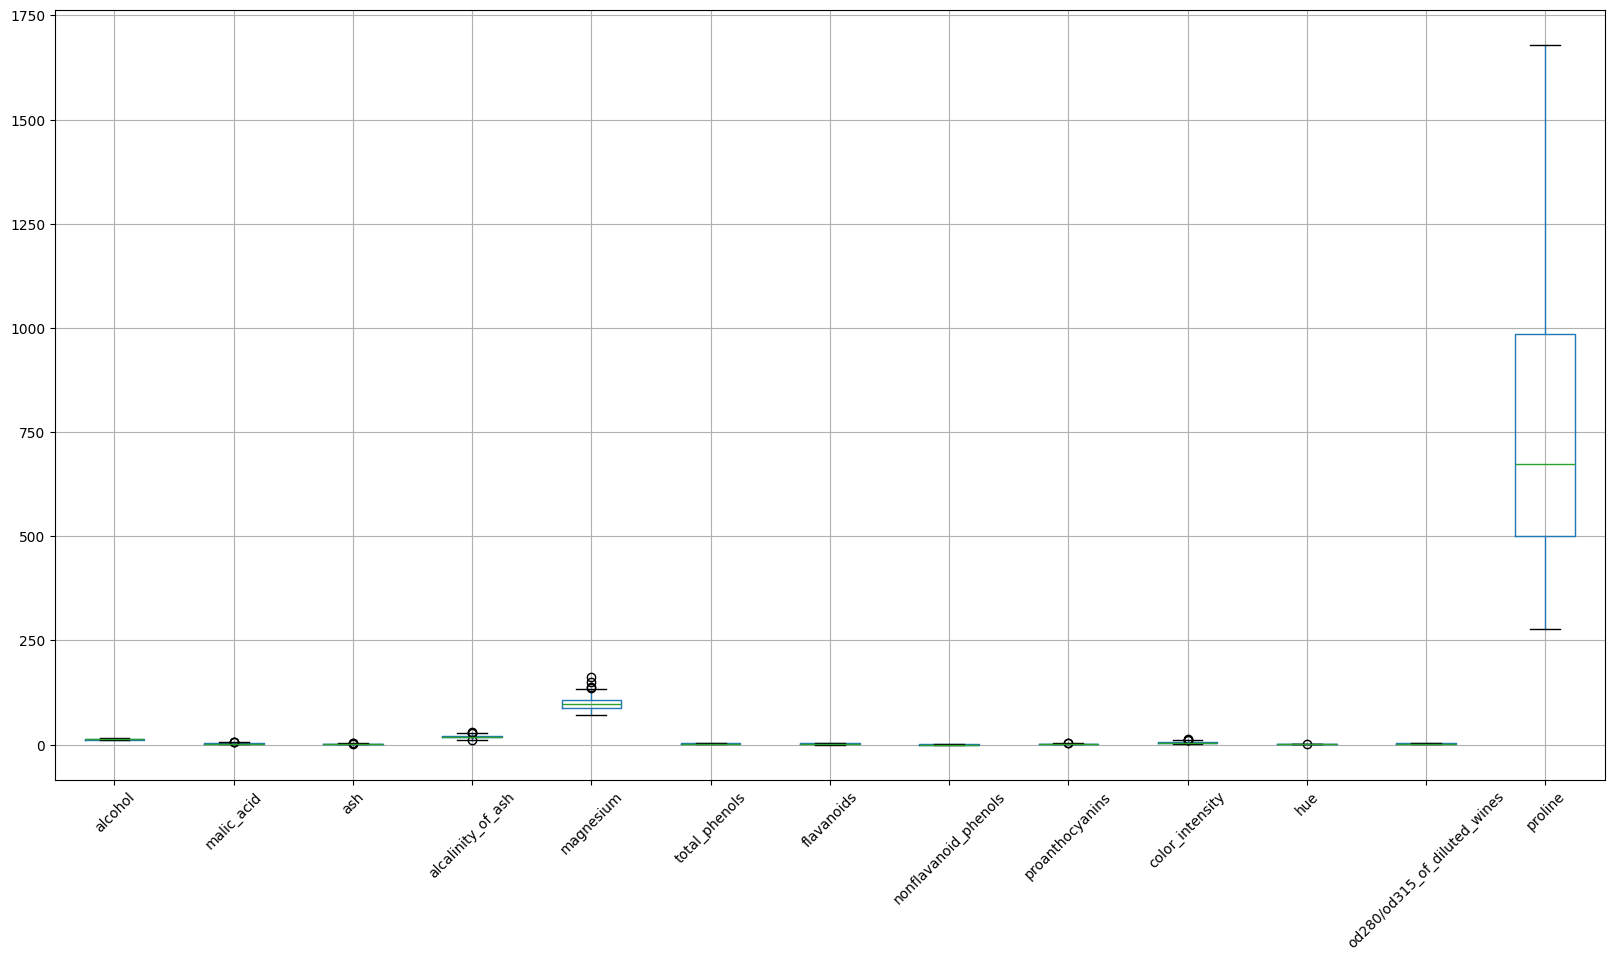

In [197]:
generate_box_plot(targetless_df)

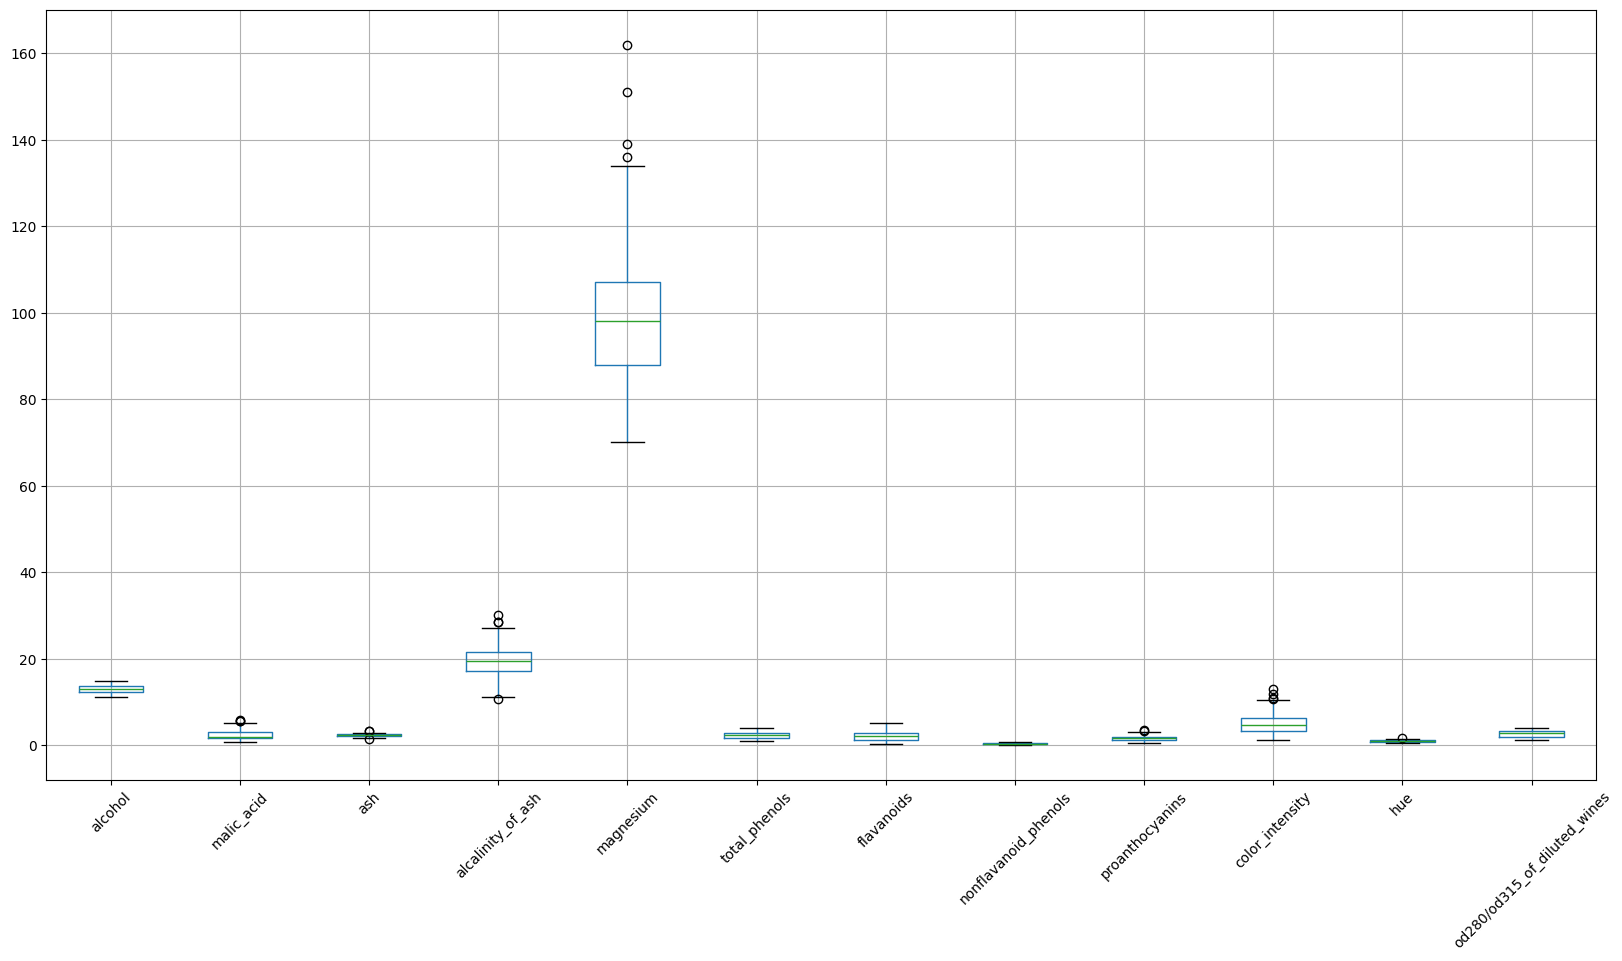

In [198]:
generate_box_plot_without_proline(targetless_df)

### 4. Find out which data points have outliers in any feature

We can see outliers in : 
- magnesium
- alcalinity_of_ash
- color intensity
- hue

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . ).

#### Methods used for ex.1.5

In [199]:
# for plotting violin plot
def plot_violin_plot(data_frame):
    plt.figure(figsize=(15, 10))
    sns.violinplot(data_frame)
    plt.xticks(rotation=45)


# for calculating correlation matrix
def calculate_corr_matrix(data_frame):
    copied_df = data_frame.copy()
    corr_matrix = copied_df.corr()
    return corr_matrix

# for plotting correlation matrix
def plot_corr_matrix(corr_matrix):
    sns.heatmap(corr_matrix)

# for plotting heatmap of correlation matrix
def plot_corr_heatmap(corr_matrix, title=None):
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr_matrix, cmap='coolwarm_r', annot=True)
    plt.title(title)

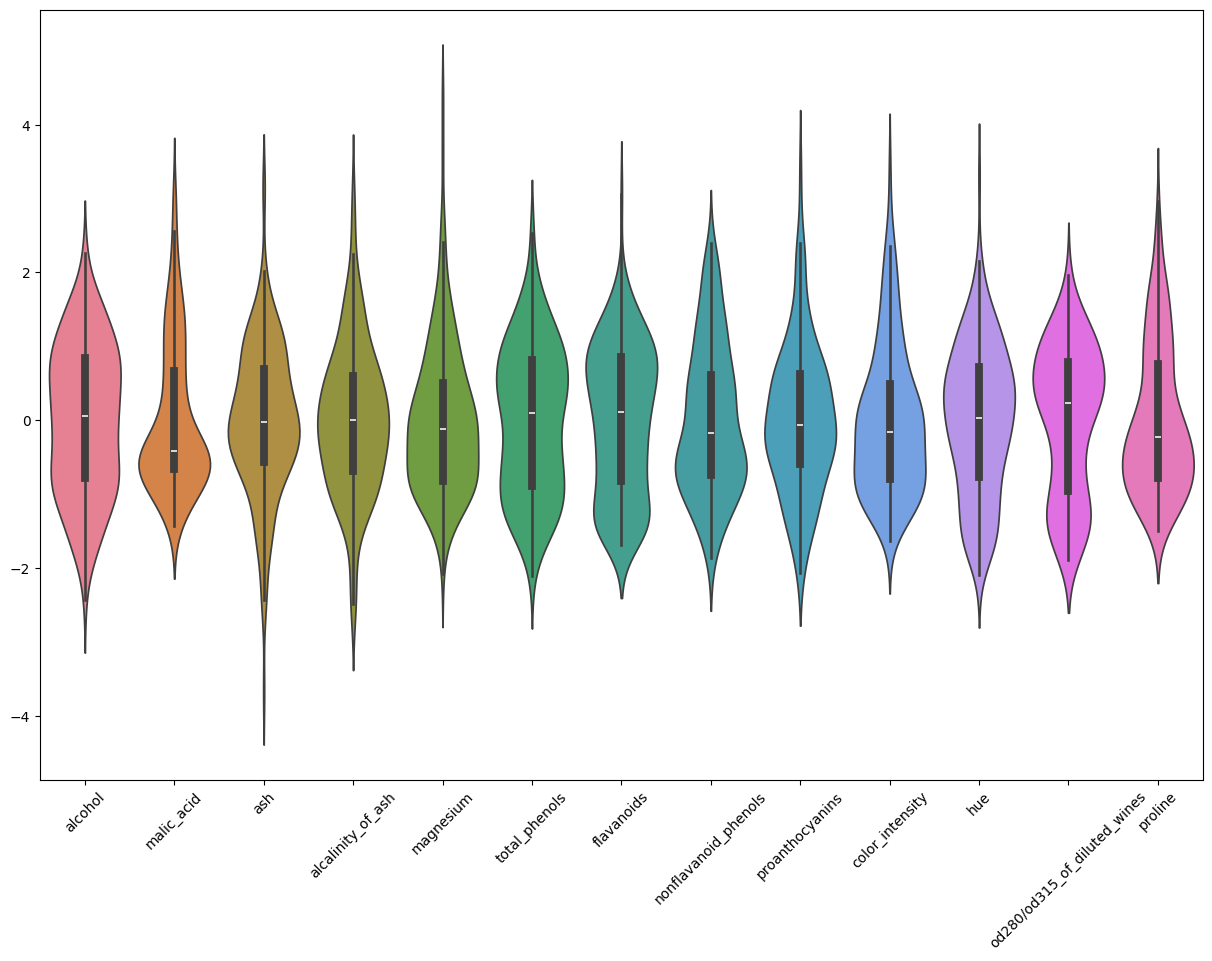

In [200]:
scaled_data_frame = slace_datascale_dataframe(targetless_df)
plot_violin_plot(scaled_data_frame)

### Corelation matrix

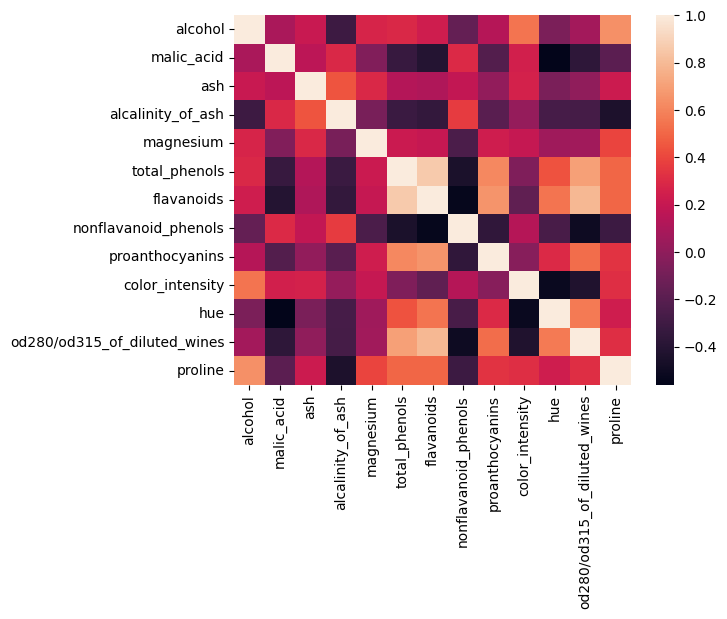

In [201]:
corr_matrix = calculate_corr_matrix(targetless_df)
plot_corr_matrix(corr_matrix)

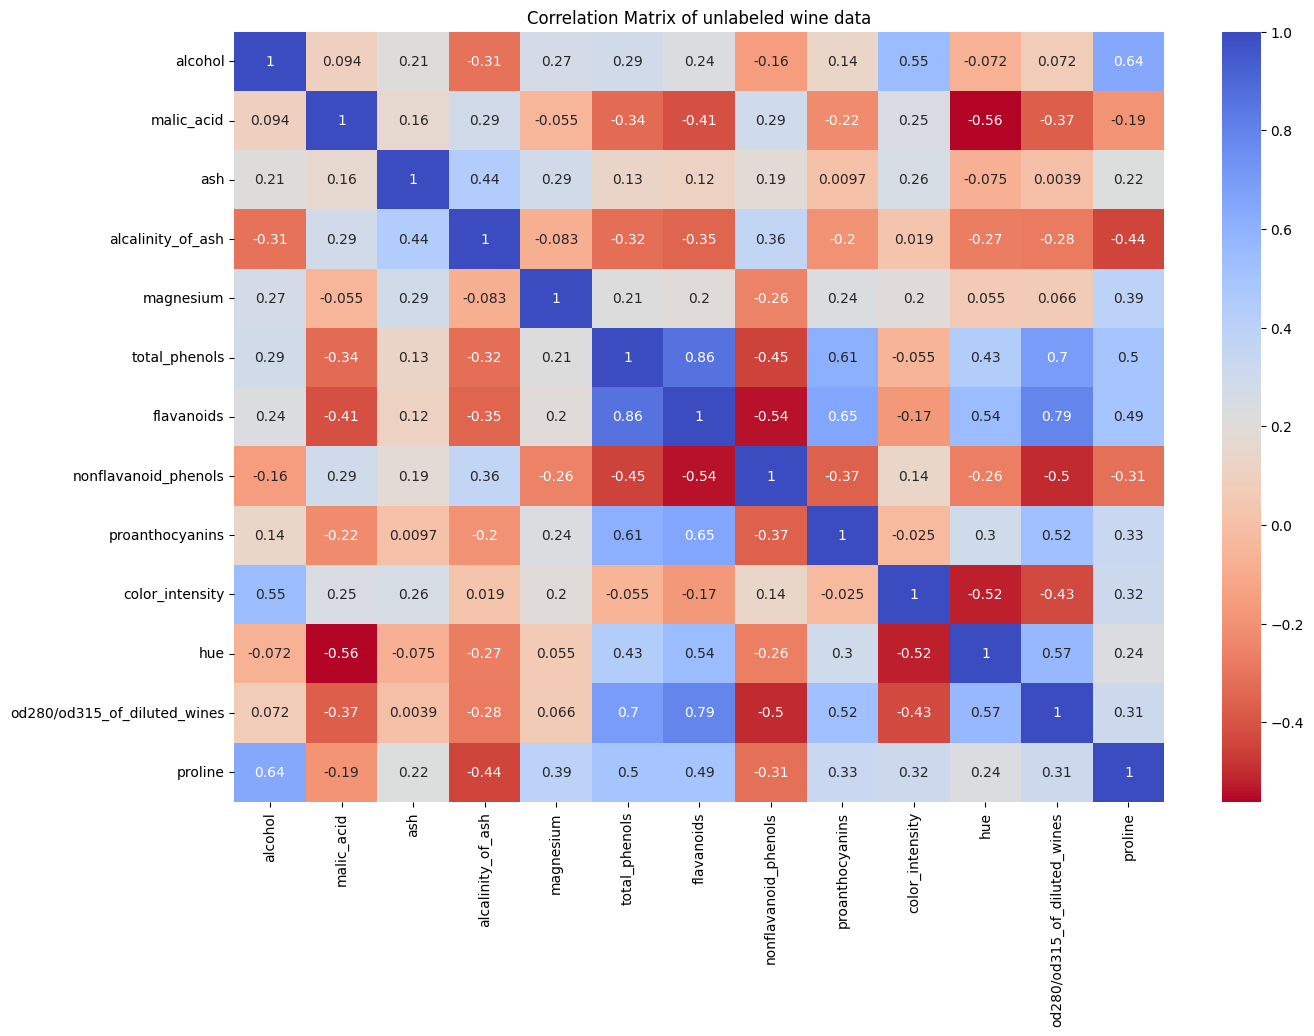

In [202]:
plot_corr_heatmap(corr_matrix, "Correlation Matrix of unlabeled wine data")

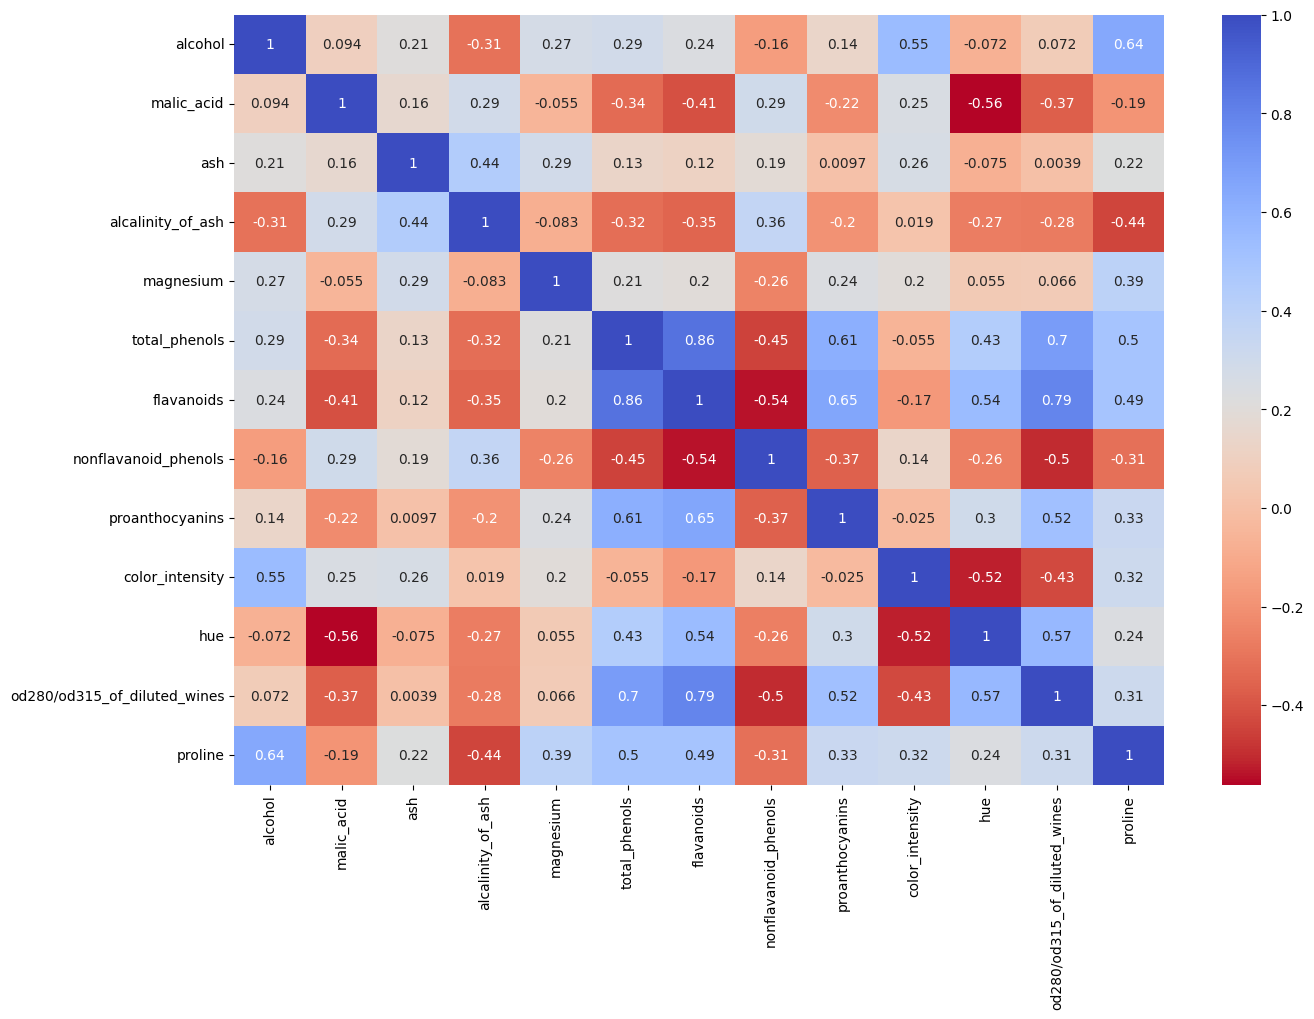

In [203]:
scale_corr_matrix = calculate_corr_matrix(scaled_data_frame)
plot_corr_heatmap(scale_corr_matrix)

# LABELED DATA

In [204]:
# set true labels in df to use them in plotting
label_df = df.copy()
label_df['target'] = y

In [205]:
label_df.head(10)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   
5    14.20        1.76  2.45               15.2      112.0           3.27   
6    14.39        1.87  2.45               14.6       96.0           2.50   
7    14.06        2.15  2.61               17.6      121.0           2.60   
8    14.83        1.64  2.17               14.0       97.0           2.80   
9    13.86        1.35  2.27               16.0       98.0           2.98   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   od280/od315_of_diluted_wines  proline  target  
0                          3.92   1065.0       0  
1                          3.40   1050.0       0  
2                          3.17   1185.0       0  
3                          3.45   1480.0       0  
4                          2.93    735.0       0  
5                          2.85   1450.0       0  
6                          3.58   1290.0       0  
7                          3.58   1295.0       0  
8                          2.85   1045.0       0  
9                          3.55   1045.0       0

In [206]:
label_df.describe()

alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       color_intensity         hue  od280/od315_of_diluted_wines      proline  \
count       178.000000  178.000000                    178.000000   178.000000   
mean          5.058090    0.957449                      2.611685   746.893258   
std           2.318286    0.228572                      0.709990   314.907474   
min           1.280000    0.480000                      1.270000   278.000000   
25%           3.220000    0.782500                      1.937500   500.500000   
50%           4.690000    0.965000                      2.780000   673.500000   
75%           6.200000    1.120000                      3.170000   985.000000   
max          13.000000    1.710000                      4.000000  1680.000000   

           target  
count  178.000000  
mean     0.938202  
std      0.775035  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000

#### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

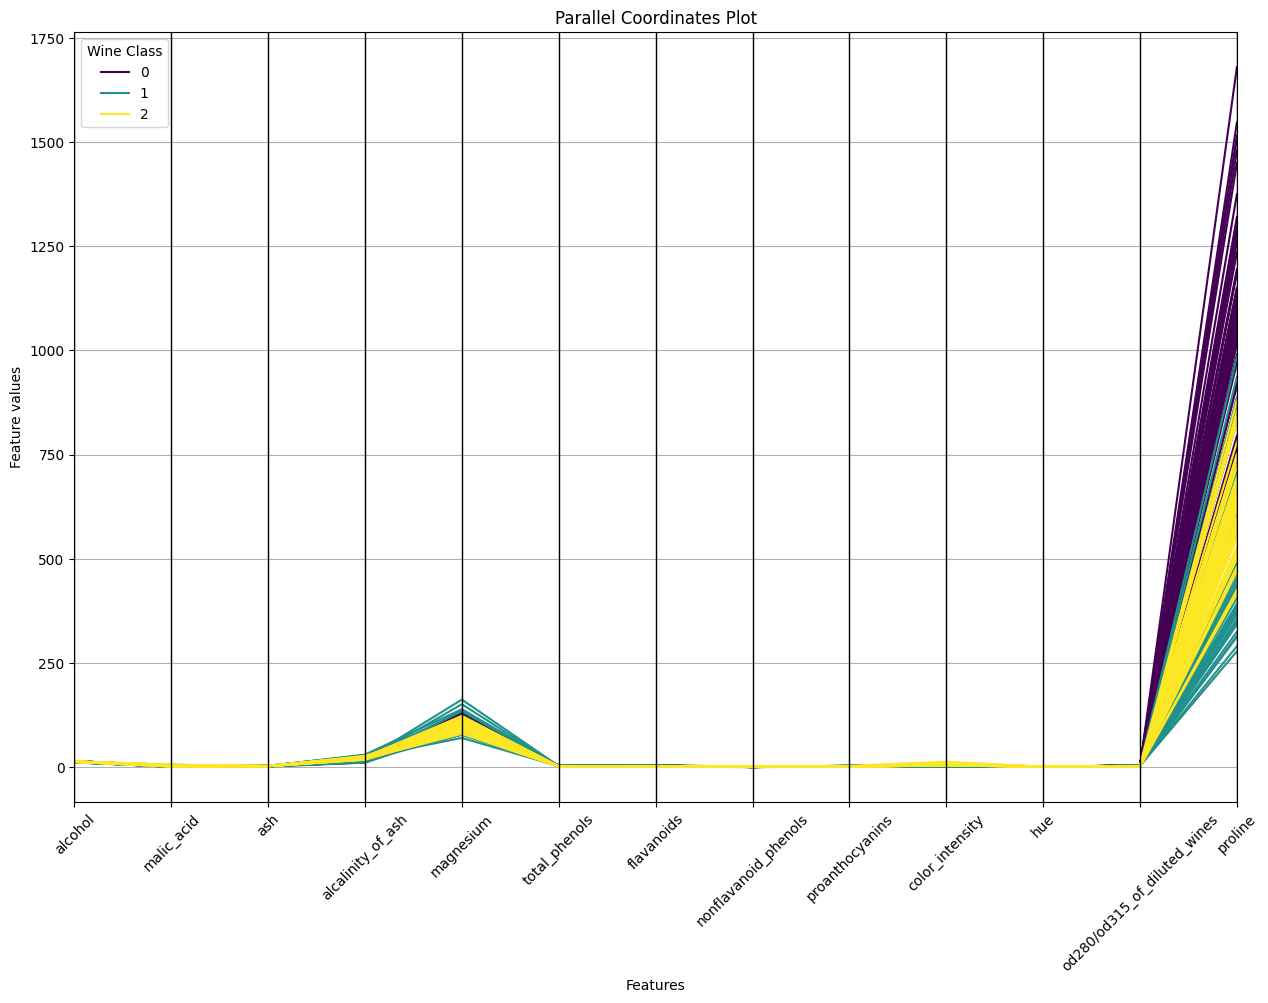

In [207]:
plot_parrallel_lines(label_df, iflabel=True, legend="Wine Class")


### With scaled values

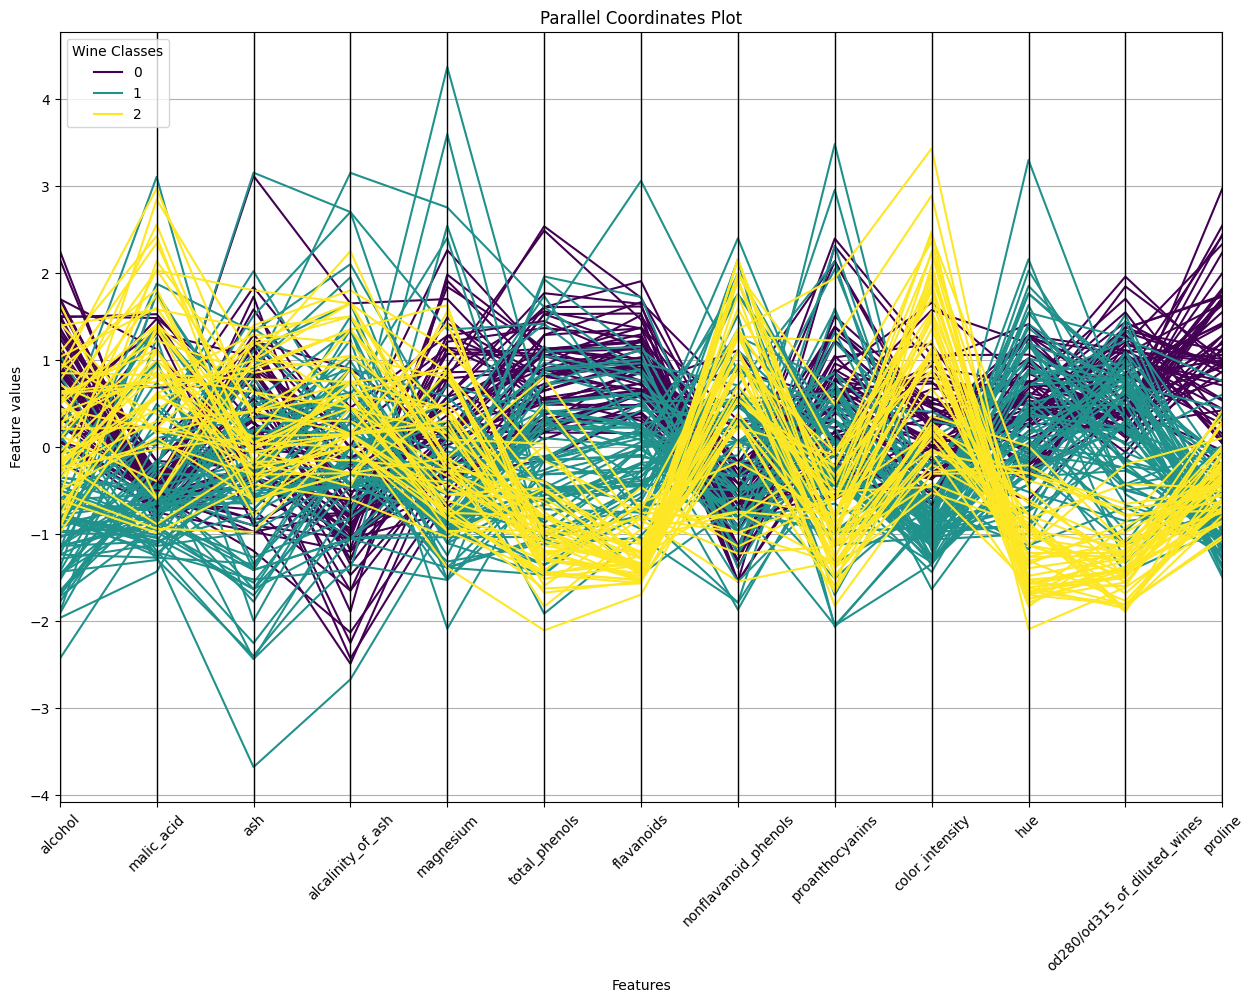

In [208]:
label_df_copy = label_df.copy()
scaled_label_df = slace_datascale_dataframe(label_df_copy)
plot_parrallel_lines(scaled_label_df, iflabel=True, legend="Wine Classes")

### 3. Detect any outliers in the features’ distribution through means of a boxplot.
### 4. Find out which data points have outliers in any feature

#### Methods used in ex.2.3

In [209]:
# for generating groupd box plot
def generate_grouped_box_plot(data_frame, target_column):

    # reshape the DataFrame from wide to long format
    df_reshaped = data_frame.melt(id_vars=target_column, var_name='features', value_name='values')

    plt.figure(figsize=(15, 10))
    sns.boxplot(x='features', y='values', hue=target_column, data=df_reshaped, palette='Set1')
    plt.xticks(rotation=45)
    plt.xlabel('Features')
    plt.ylabel('Feature values')
    plt.legend(loc="upper left", title="Wine Class")
    plt.tight_layout()

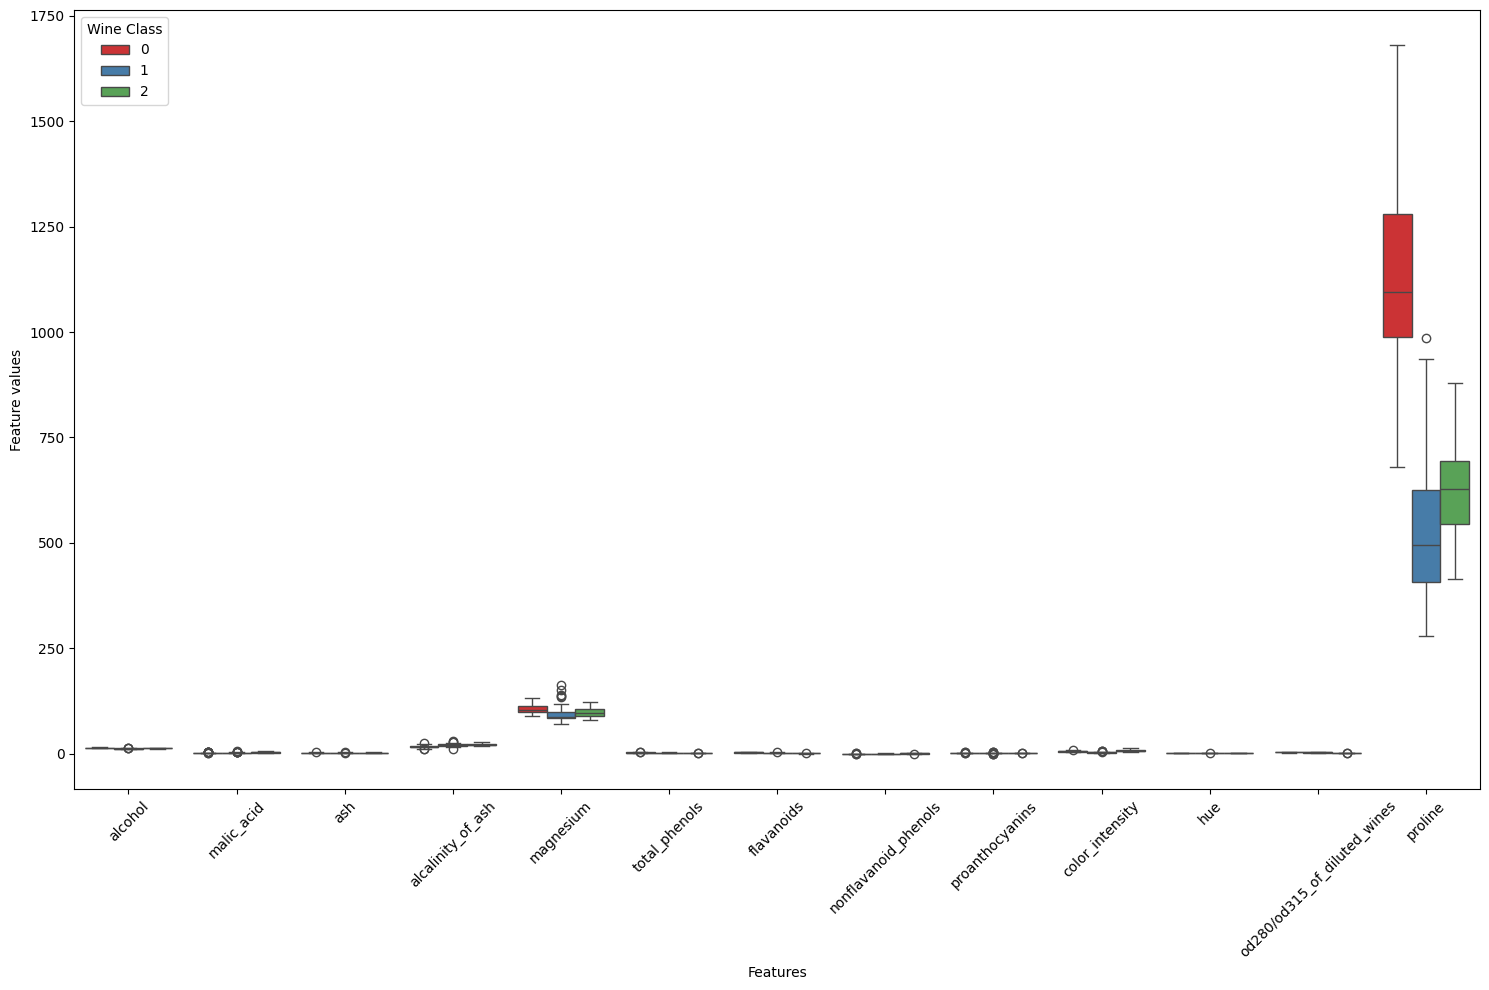

In [210]:
generate_grouped_box_plot(label_df, 'target')

Without scaled values it is hard to read anything from the plot, so we need to rescale values

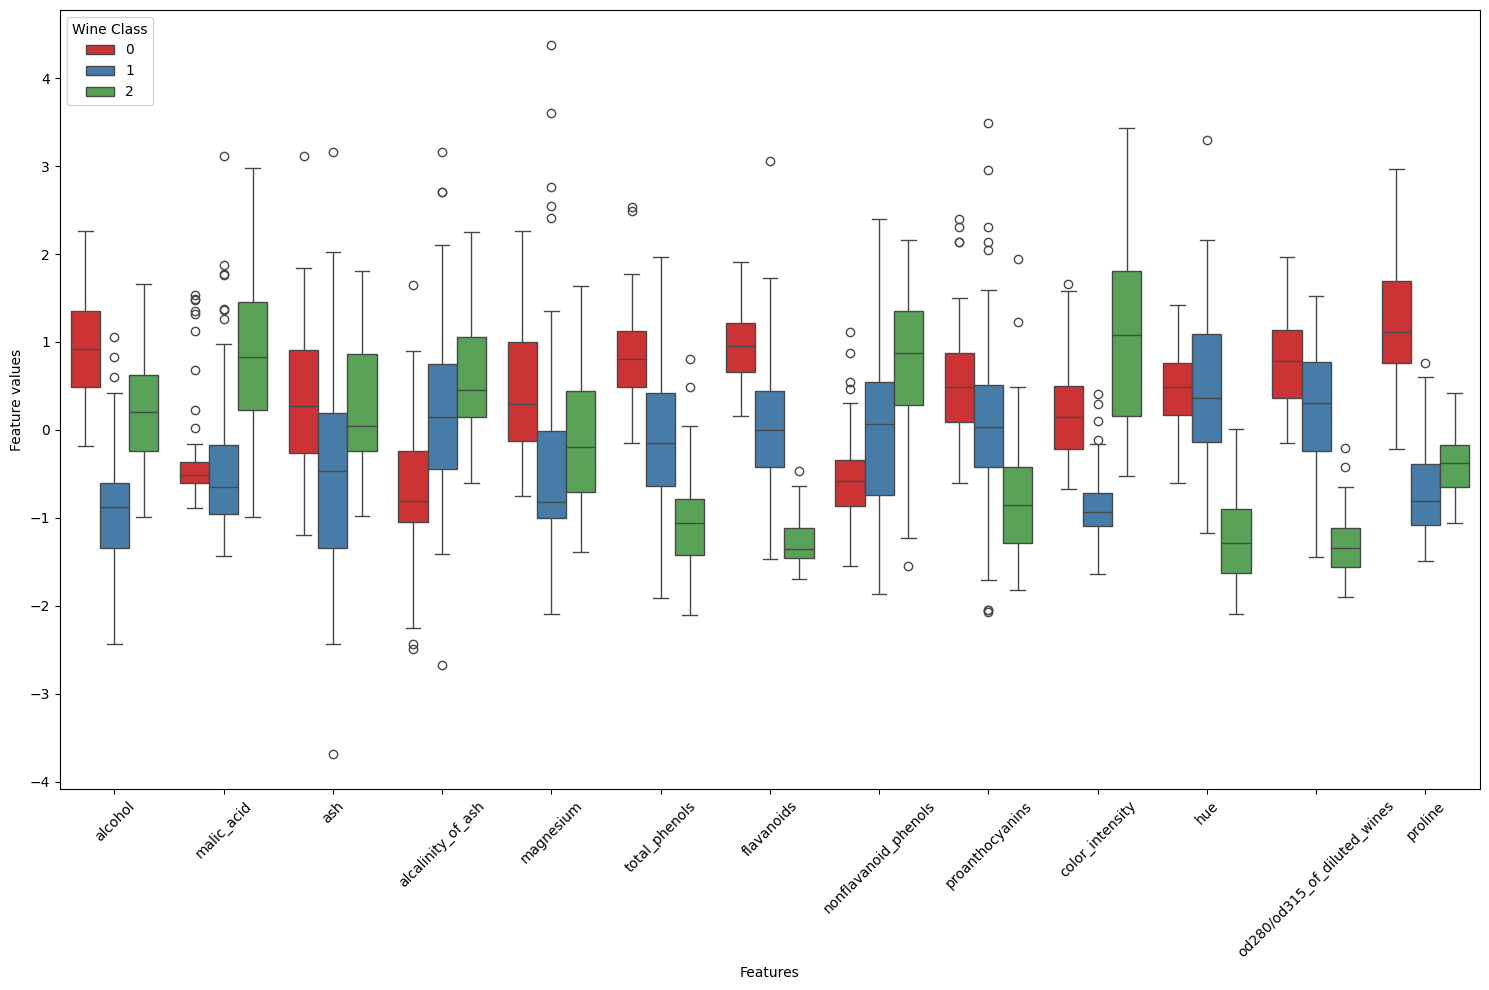

In [211]:
scaled_label_df['target'] = y
generate_grouped_box_plot(scaled_label_df, target_column='target')

A grouped box plot with scled values  allows us to clearly visualize the distribution of multiple features across different groups, making it easy to identify variations and detect outliers within each feature.

For example we can see outliers in : 
- malic_acid
- magnesium
- pranthocyanins
- nonflavanoiud_phenols

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )

#### Methods used for ex.2.5

In [212]:
# def for splitting data into each groupd

def split_data(data_frame, label):
    label_df = data_frame.copy()
    return label_df[label_df['target'] == label]


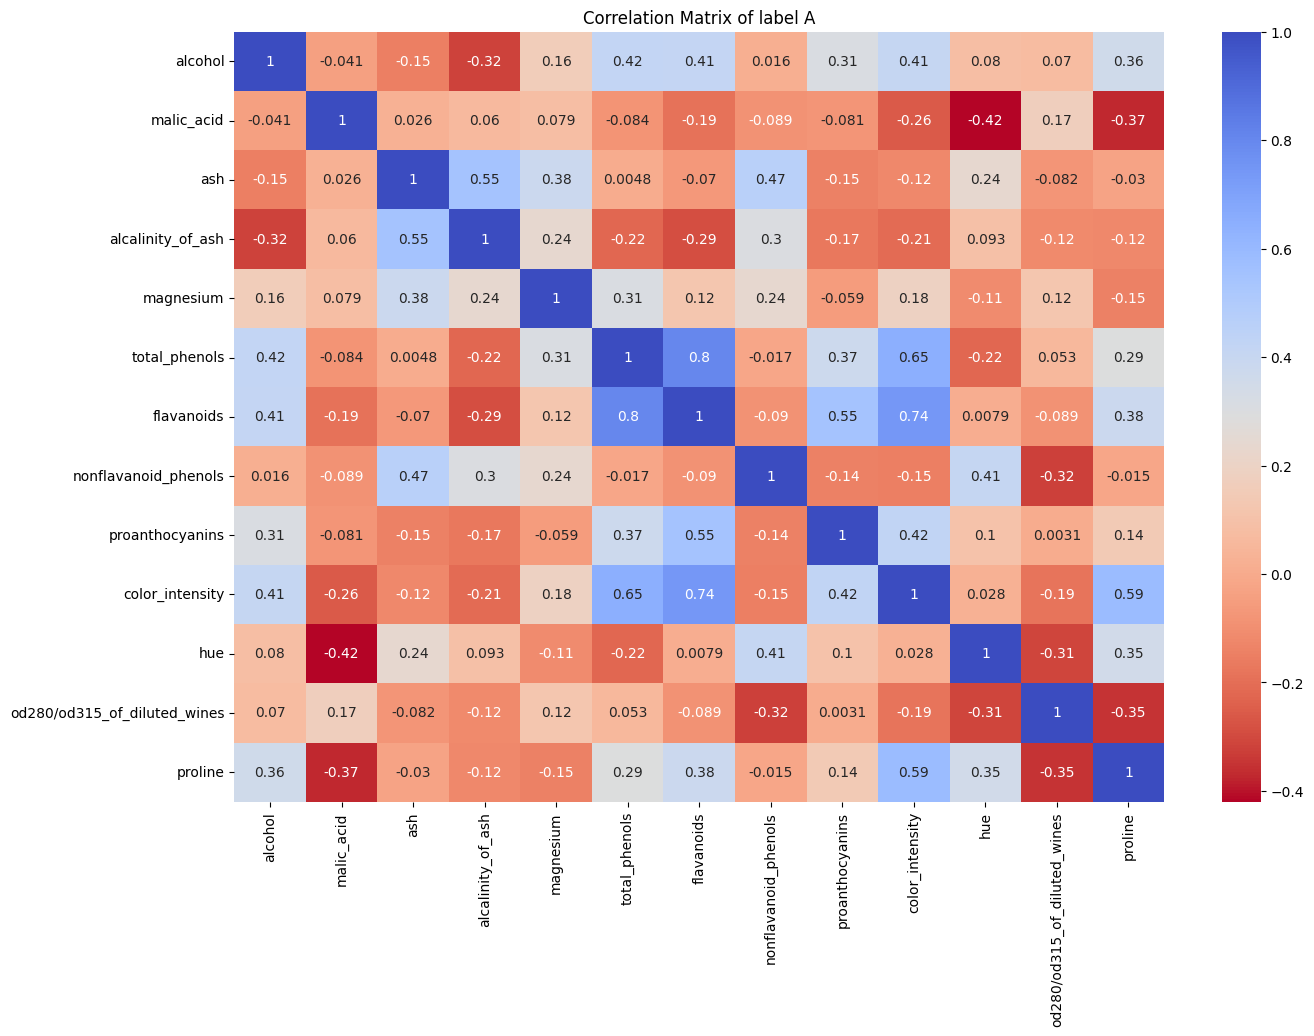

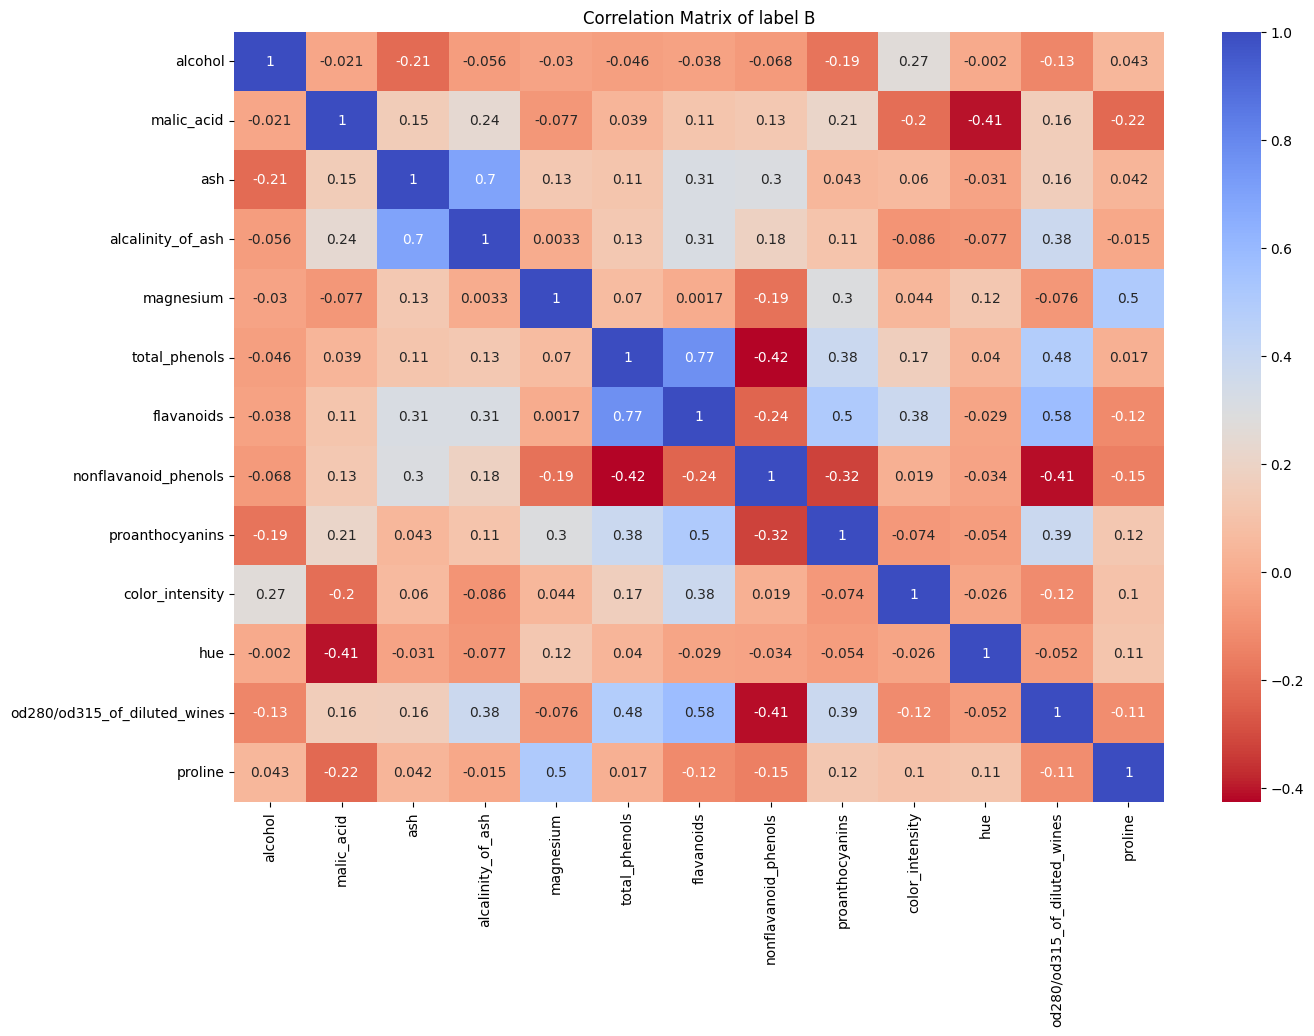

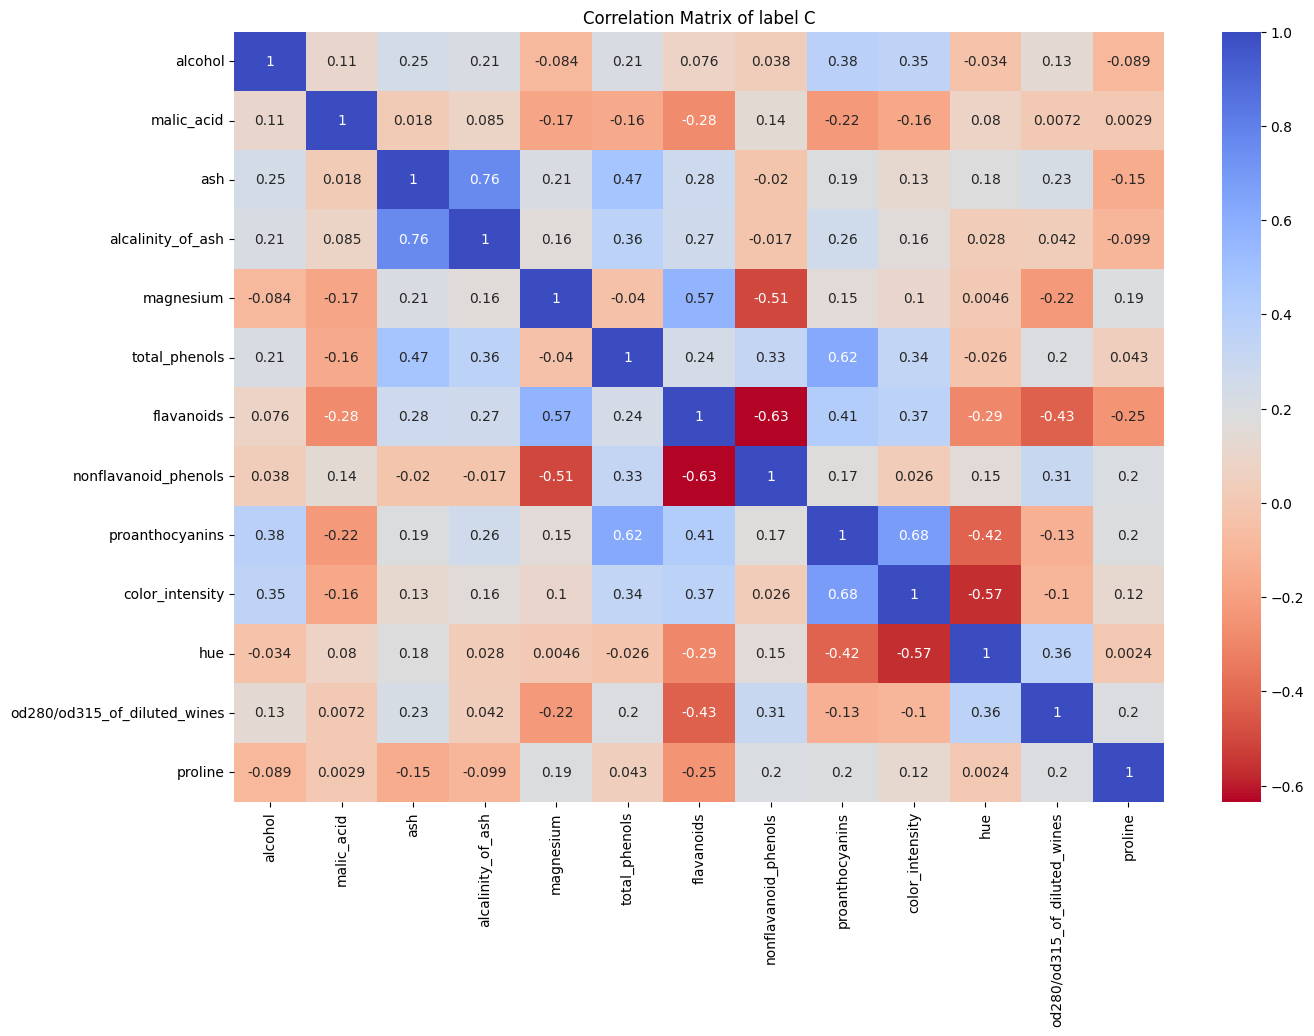

In [213]:
label_a = split_data(label_df, 0)
label_b = split_data(label_df, 1)
label_c = split_data(label_df, 2)

labels = [label_a, label_b, label_c]
names = ['A', 'B', 'C']

for index, label in enumerate(labels):
    label.drop(columns='target', inplace=True)
    label_corr_matrix = calculate_corr_matrix(label)
    plot_corr_heatmap(label_corr_matrix, f"Correlation Matrix of label {names[index]}")
    plt.size = (10, 10)


# __________________________________________________________________________________

# HOMEWORK

## Unlabeled data

In [214]:
from sklearn.datasets import load_iris

x_data, y_labels = load_iris(as_frame=True, return_X_y=True)

irises_df = x_data.copy()

In [215]:
irises_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

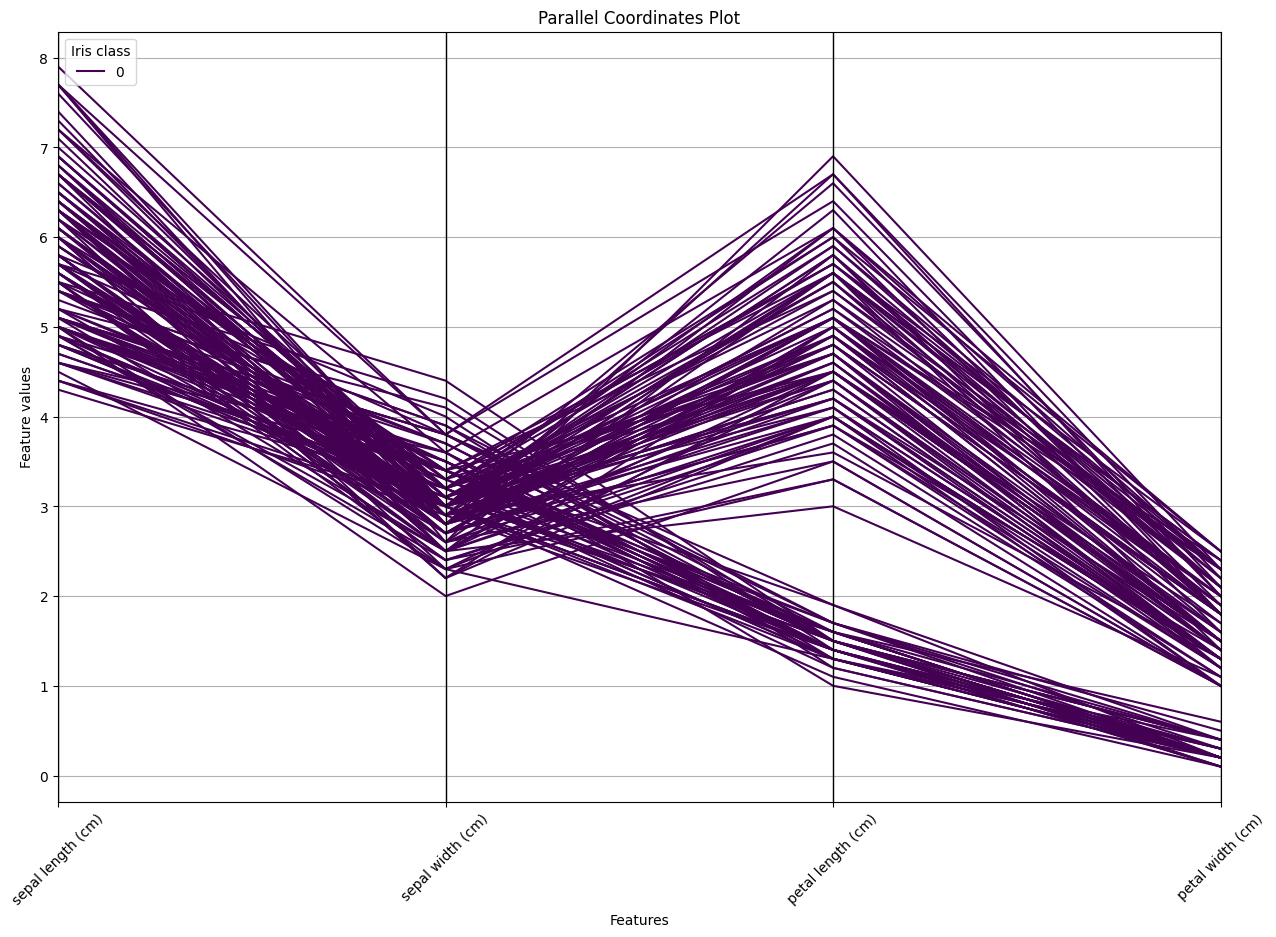

In [216]:
plot_parrallel_lines(irises_df, "Iris class")

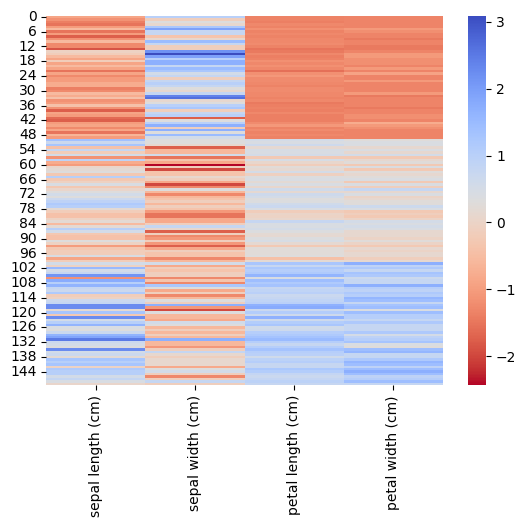

In [217]:
plot_heatmap(irises_df)

### 2. Decide whether the data needs scaling

The feature values are in similiar rangees so we don't need to use scaling for this dataset

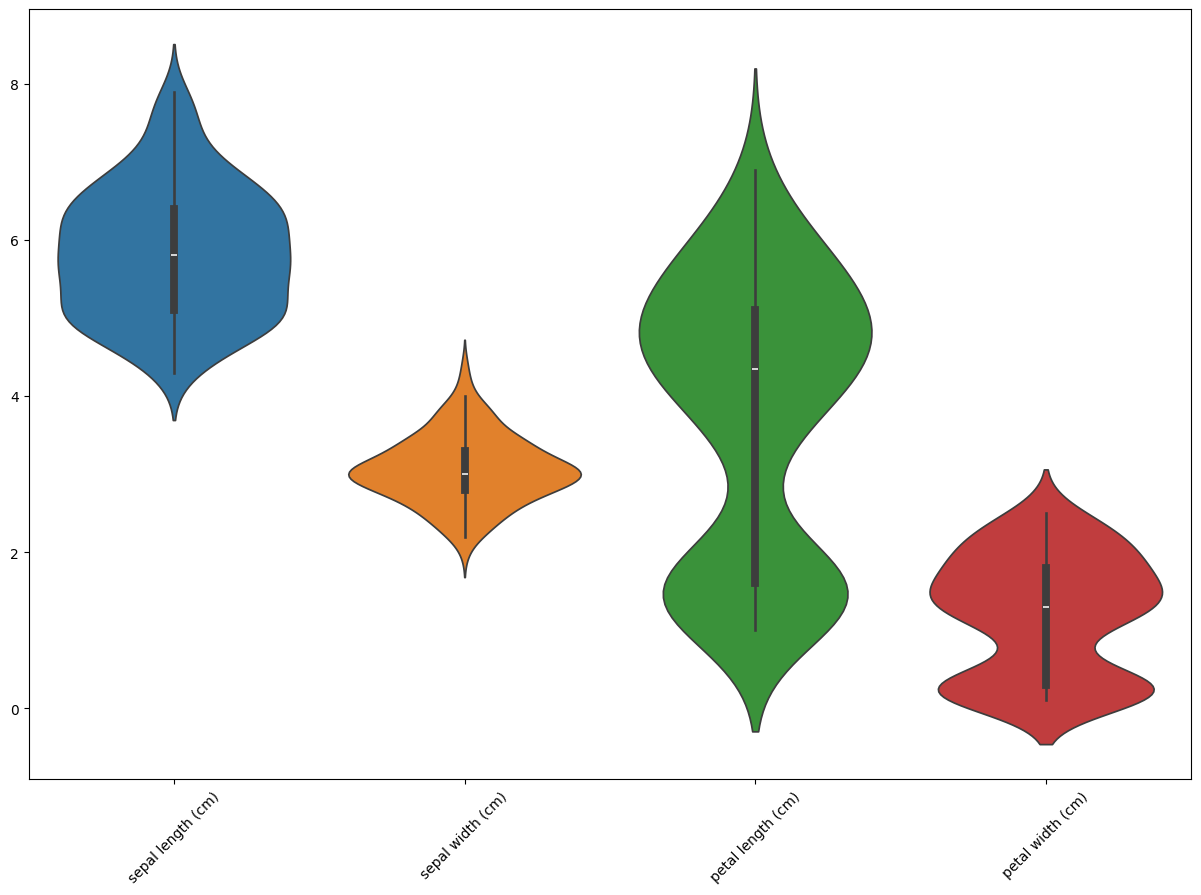

In [218]:
plot_violin_plot(irises_df)

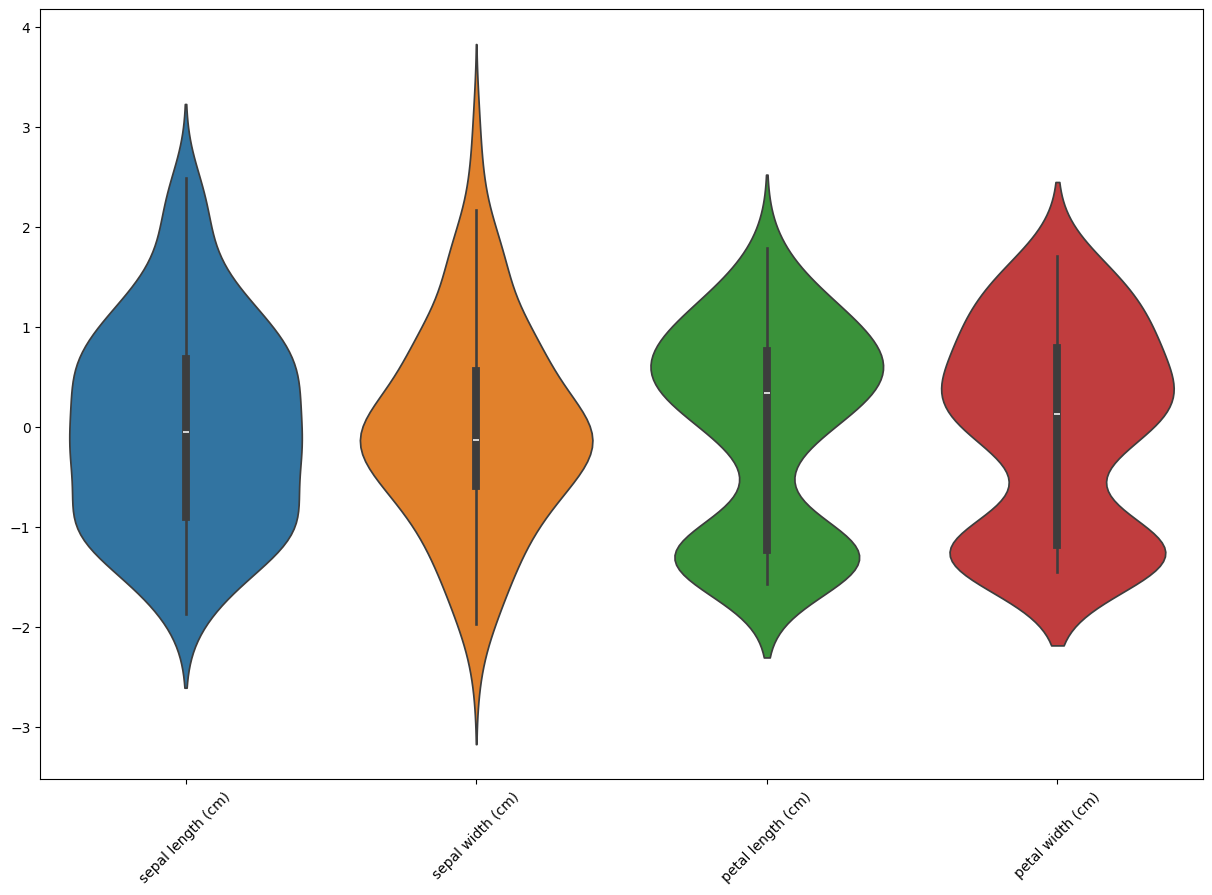

In [219]:
scale_irises_df = slace_datascale_dataframe(irises_df)
plot_violin_plot(scale_irises_df)

After scaling and displaying dataset in violin plot, i would rather work with unscaled values, so it's better represent real length of leaves

### 3. Detect any outliers in the features’ distribution through means of a boxplot

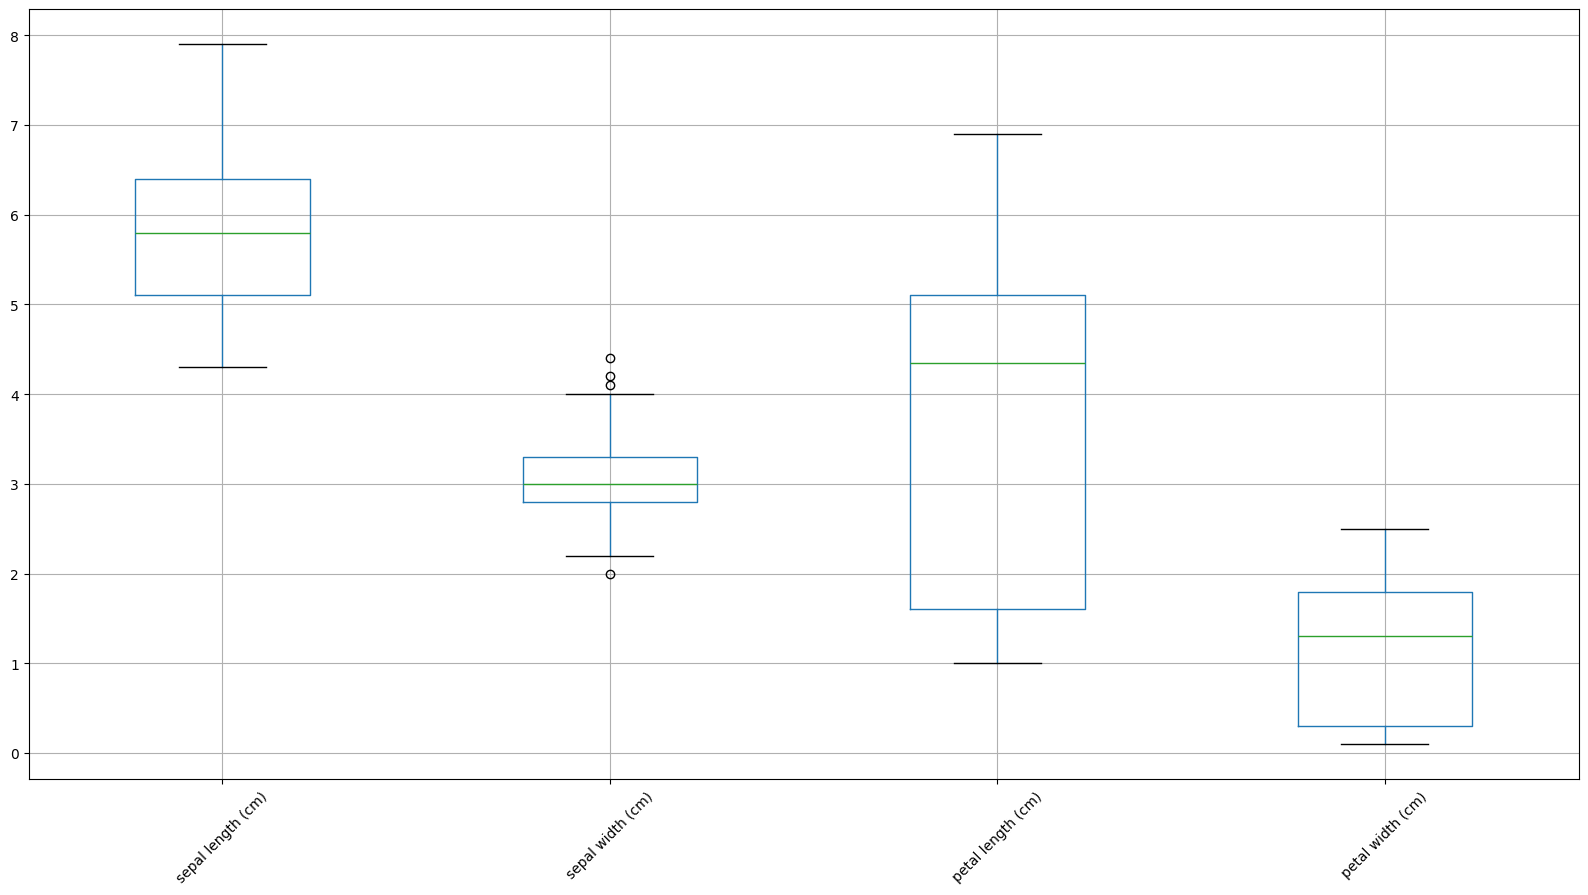

In [220]:
generate_box_plot(irises_df)

We can see outliers only in sepal_width category

### 4. Find out which data points have outliers in any feature.

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )

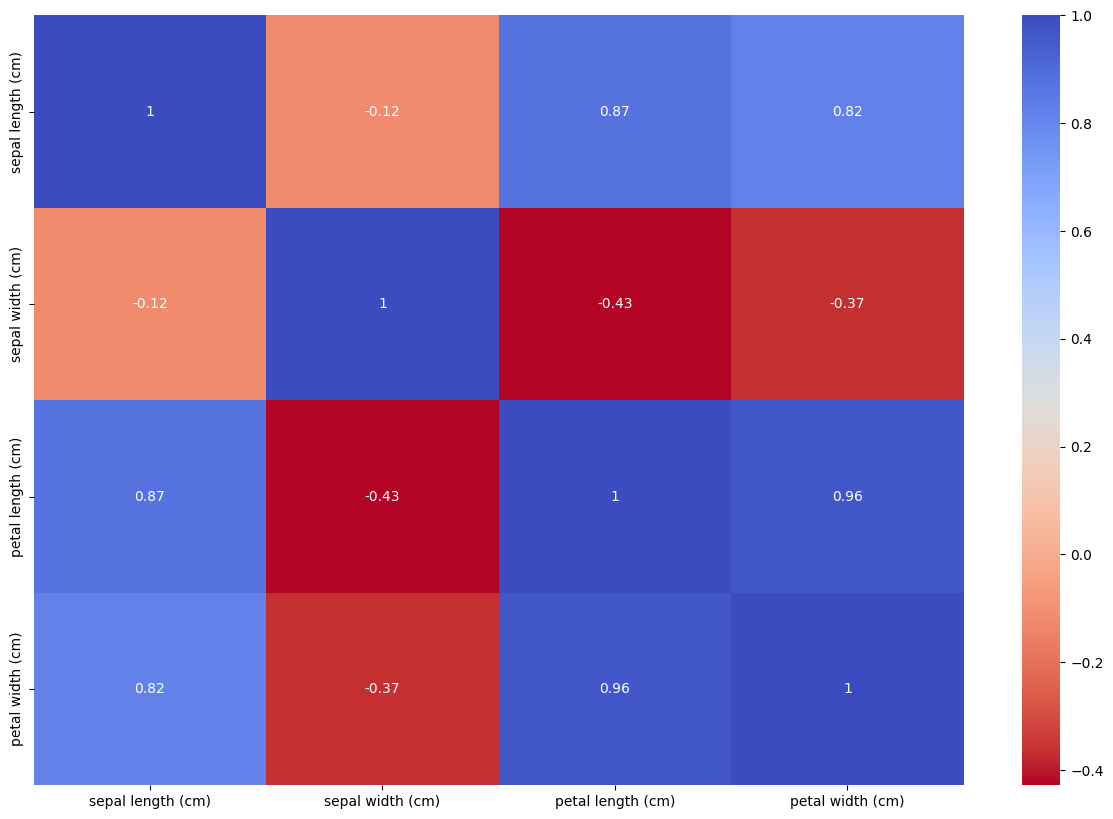

In [221]:
iris_corr_matrix = calculate_corr_matrix(irises_df)
plot_corr_heatmap(iris_corr_matrix)

array([[<Axes: xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<Axes: xlabel='sepal length (cm)', ylabel='petal width (cm)'>,
        <Axes: xlabel='sepal width (cm)', ylabel='petal width (cm)'>,
  

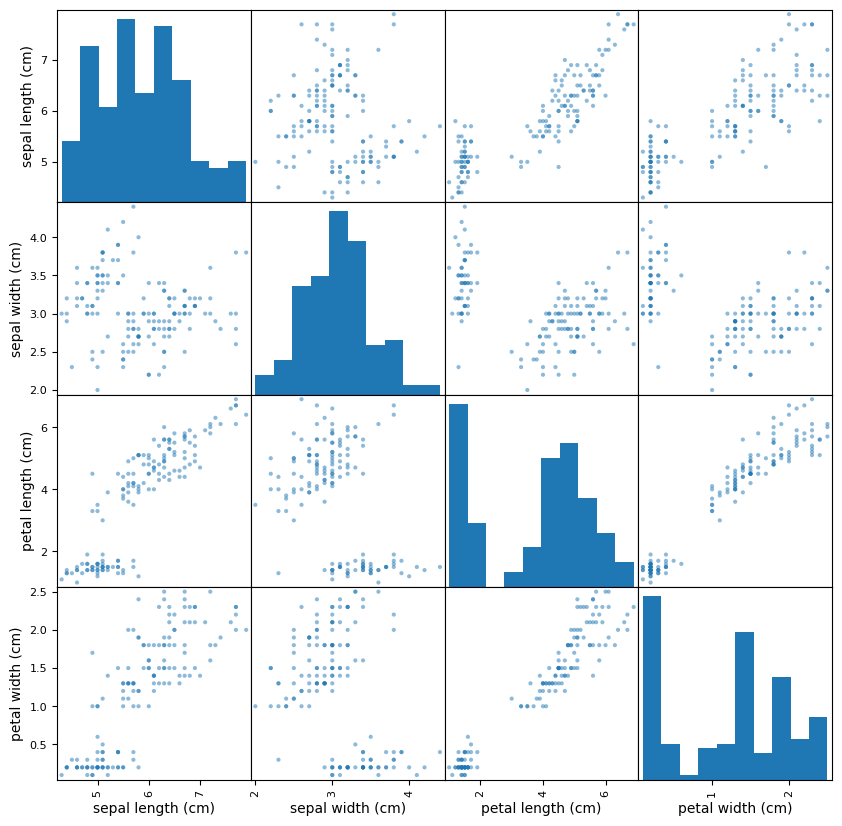

In [222]:
scatter_matrix(irises_df, figsize=(10,10))

## Labeled Data

### 1. Display all features in a single plot by using a parallel lines plot or a heatmap.

In [223]:
irises_df_label = x_data.copy()
irises_df_label['label'] = y_labels
irises_df_label.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   label  
0      0  
1      0  
2      0  
3      0  
4      0

<Axes: >

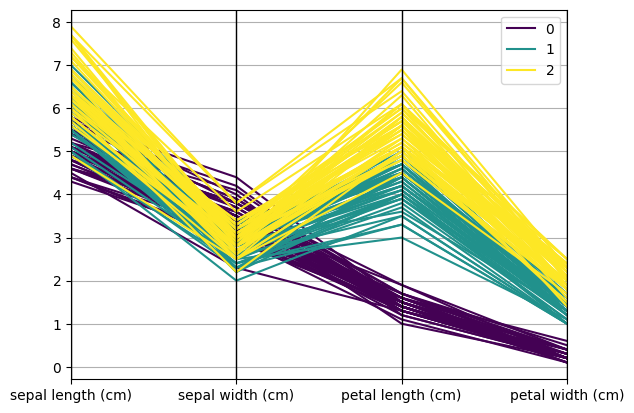

In [224]:
parallel_coordinates(irises_df_label,class_column='label', colormap='viridis')

### 2. Decide whether the data needs scaling

It the same as in unlabeled data, I don't think we need to scale the values, cause the ranges are similiar

### 3. Detect any outliers in the features’ distribution through means of a boxplot

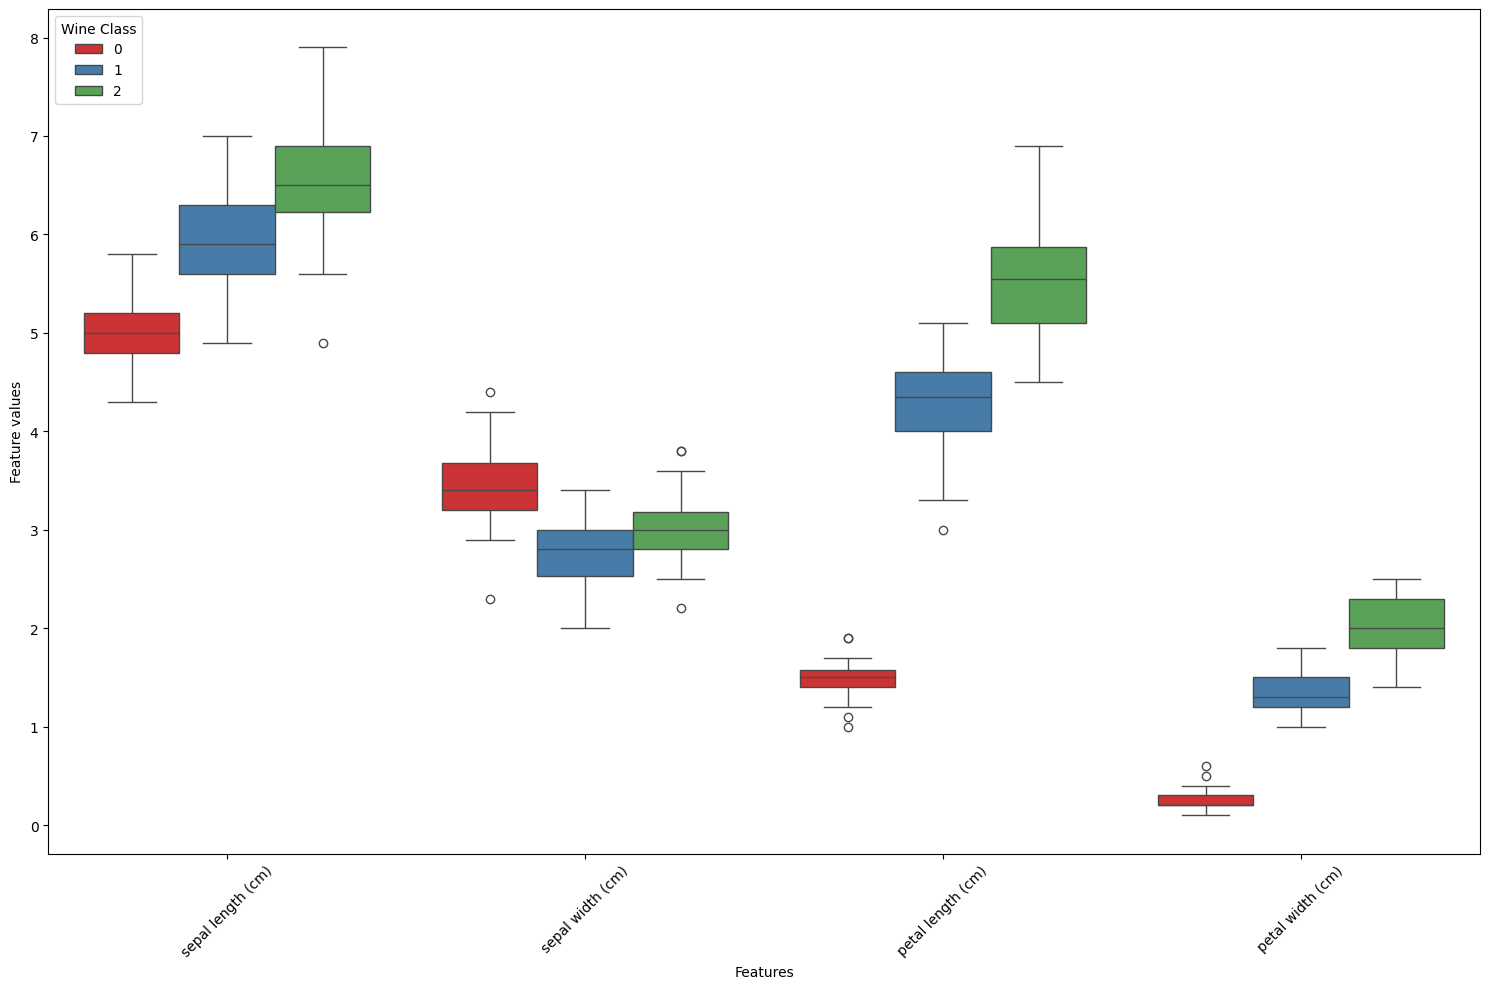

In [225]:
group_column = 'label'
generate_grouped_box_plot(irises_df_label, group_column)

### 4. Find out which data points have outliers in any feature

### 5. Detect correlations between features (e.g. by plotting a scatter matrix, computing correlation values, . . . )

Text(0.5, 1.02, 'Scatter Matrix of Iris Data Set')

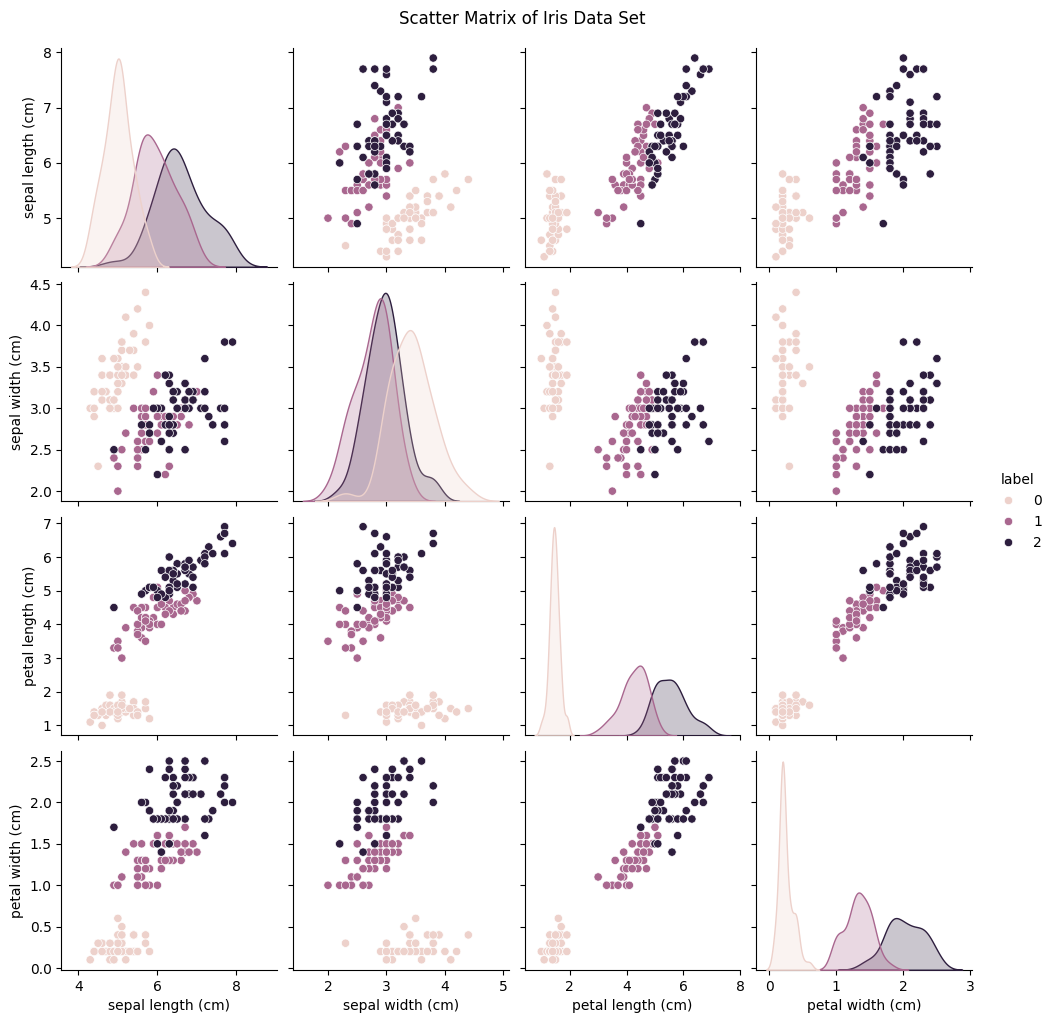

In [226]:
sns.pairplot(irises_df_label, hue='label', diag_kind='kde')
plt.suptitle("Scatter Matrix of Iris Data Set", y=1.02)

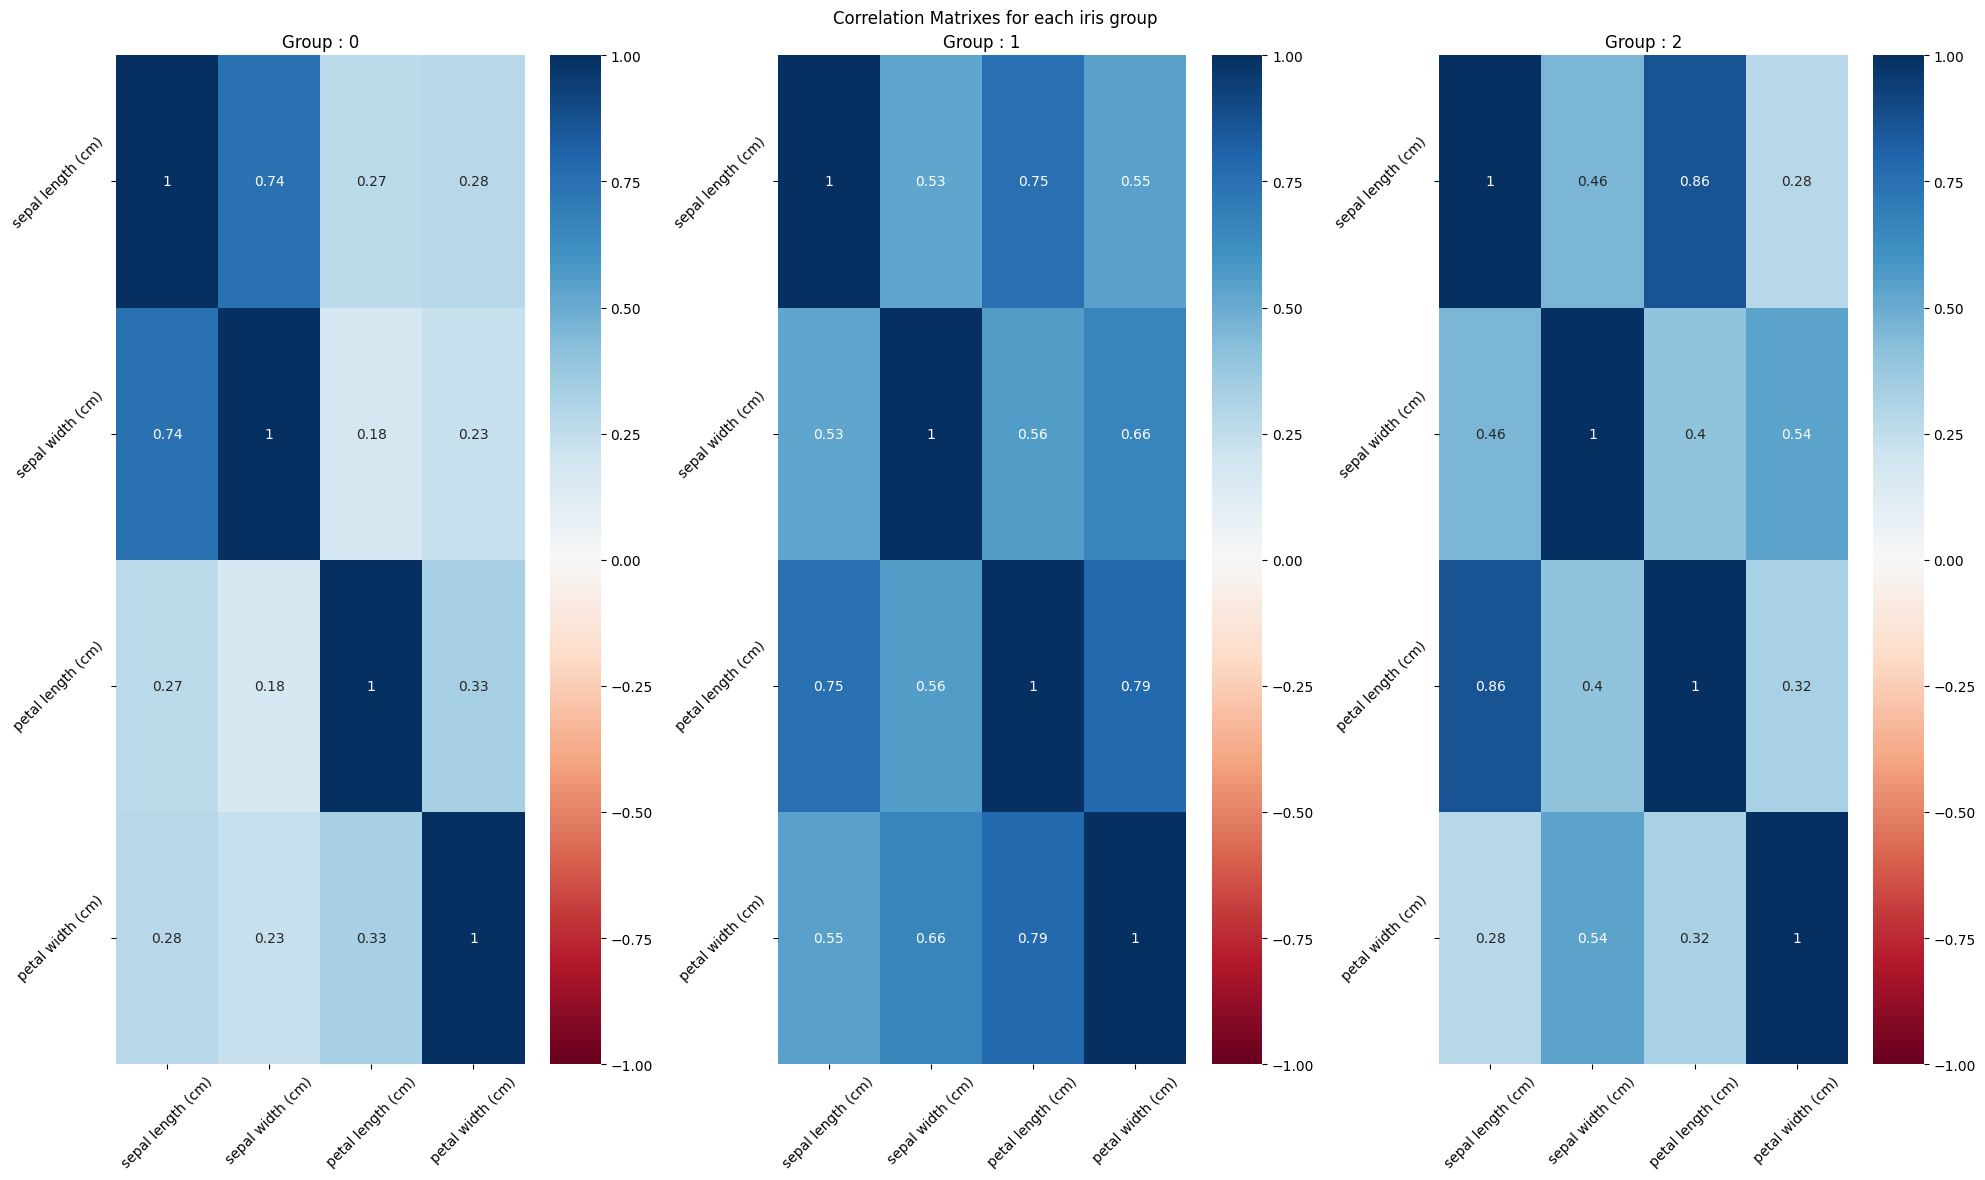

In [227]:
groups = irises_df_label.groupby('label')

corr_matrices = {label: group.drop(columns='label').corr() for label, group in groups}


plt.figure(figsize=(20, 12))
plt.suptitle("Correlation Matrixes for each iris group")

for i, (label, corr_matrix) in enumerate(corr_matrices.items(), 1):
    plt.subplot(1, len(corr_matrices), i)
    sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1)
    plt.title(f'Group : {label}')
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)

plt.tight_layout()
plt.show()